## ƒê·ªí √ÅN NMKHDL 

- Tr·∫ßn V∆∞∆°ng Thi√™n : 1712781
- T·ªëng S∆°n T√πng : 18120642

___
## I: Kh√°m ph√° d·ªØ li·ªáu


In [3]:

import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
# from mpl_toolkits.basemap import Basemap
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings("ignore")

ƒê·ªçc d·ªØ li·ªáu t·ª´ flight.csv, ƒê·ªìng th·ªùi cho bi·∫øt k√≠ch th∆∞·ªõc c·ªßa t·ªáp d·ªØ li·ªáu, th√¥ng tin ki·ªÉu d·ªØ li·ªáu, t·ªâ l·ªá gi√° tr·ªã thi·∫øu c·ªßa t·ª´ng thu·ªôc t√≠nh

In [4]:
df = pd.read_csv('flights.csv', low_memory=False)
print('Dataframe dimensions:', df.shape)
#____________________________________________________________
# gives some infos on columns types and number of null values
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
tab_info

Dataframe dimensions: (1048575, 31)


YEAR  MONTH    DAY DAY_OF_WEEK AIRLINE FLIGHT_NUMBER  \
column type       int64  int64  int64       int64  object         int64   
null values (nb)      0      0      0           0       0             0   
null values (%)       0      0      0           0       0             0   

                 TAIL_NUMBER ORIGIN_AIRPORT DESTINATION_AIRPORT  \
column type           object         object              object   
null values (nb)        7750              0                   0   
null values (%)     0.739098              0                   0   

                 SCHEDULED_DEPARTURE DEPARTURE_TIME DEPARTURE_DELAY TAXI_OUT  \
column type                    int64        float64         float64  float64   
null values (nb)                   0          39515           39515    40229   
null values (%)                    0        3.76845         3.76845  3.83654   

                 WHEELS_OFF SCHEDULED_TIME ELAPSED_TIME AIR_TIME DISTANCE  \
column type         float64        float64      float64  float64    int64   
null values (nb)      40229              2        43071    43071        0   
null values (%)     3.83654    0.000190735      4.10757  4.10757        0   

                 WHEELS_ON  TAXI_IN SCHEDULED_ARRIVAL ARRIVAL_TIME  \
column type        float64  float64             int64      float64   
null values (nb)     41296    41296                 0        41296   
null values (%)     3.9383   3.9383                 0       3.9383   

                 ARRIVAL_DELAY DIVERTED CANCELLED CANCELLATION_REASON  \
column type            float64    int64     int64              object   
null values (nb)         43071        0         0             1008048   
null values (%)        4.10757        0         0              96.135   

                 AIR_SYSTEM_DELAY SECURITY_DELAY AIRLINE_DELAY  \
column type               float64        float64       float64   
null values (nb)           820047         820047        820047   
null values (%)           78.2059        78.2059       78.2059   

                 LATE_AIRCRAFT_DELAY WEATHER_DELAY  
column type                  float64       float64  
null values (nb)              820047        820047  
null values (%)              78.2059       78.2059

M·ªói d√≤ng trong file `flight.csv` t∆∞∆°ng ·ª©ng v·ªõi m·ªôt chuy·∫øn bay ƒë∆∞·ª£c m√¥ t·∫£ theo 31 bi·∫øn. 
√ù nghƒ©a c·ªßa m·ªôt s·ªë bi·∫øn quan tr·ªçng:
- **YEAR, MONTH, DAY, DAY_OF_WEEK**: Th·ªùi ƒëi·ªÉm chuy·∫øn bay b·∫Øt ƒë·∫ßu <br/>
- **AIRLINE**: M√£ h√£ng h√†ng kh√¥ng<br/>
- **ORIGIN_AIRPORT** and **DESTINATION_AIRPORT**: M√£ do IATA c·∫•p cho m·ªói s√¢n bay <br/>
- **SCHEDULED_DEPARTURE** and **SCHEDULED_ARRIVAL** : L·ªãch tr√¨nh c·∫•t c√°nh, h·∫° c√°nh <br/> 
- **DEPARTURE_TIME** and **ARRIVAL_TIME**: Th·ªùi gian c·∫•t c√°nh, h·∫° c√°nh th·ª±c t·∫ø <br/> 
- **DEPARTURE_DELAY** and **ARRIVAL_DELAY**: th·ªùi gian delay khi h·∫° c√°nh, c·∫•t c√°nh <br/> 
- **DISTANCE**: Kho·∫£ng c√°ch t√≠nh theo m√©t gi·ªØa 2 s√¢n bay c·ªßa 1 chuy·∫øn bay  <br/>
T·ªáp `airport.csv`, cung c·∫•p m√¥ t·∫£ ƒë·∫ßy ƒë·ªß h∆°n v·ªÅ c√°c s√¢n bay:

In [5]:
airports = pd.read_csv("airports.csv")

Cho bi·∫øt s·ªë l∆∞·ª£ng chuy·∫øn bay ƒë∆∞·ª£c ghi nh·∫≠n trong nƒÉm 2019 c·ªßa t·ª´ng s√¢n bay:

In [6]:
count_flights = df['ORIGIN_AIRPORT'].value_counts()
count_flights

ATL    66599
ORD    52961
DFW    50933
LAX    38473
DEN    38254
       ...  
UST       33
BGR       22
PPG       21
ADK       20
ITH        6
Name: ORIGIN_AIRPORT, Length: 315, dtype: int64

V·ªõi k√≠ch th∆∞·ªõc l·ªõn c·ªßa t·∫≠p d·ªØ li·ªáu, em quy·∫øt ƒë·ªãnh ch·ªâ xem x√©t m·ªôt t·∫≠p h·ª£p con c·ªßa d·ªØ li·ªáu ƒë·ªÉ gi·∫£m th·ªùi gian t√≠nh to√°n. Ta s·∫Ω ch·ªâ gi·ªØ nh·ªØng chuy·∫øn bay ·ªü th√°ng 1

In [7]:
df = df[df['MONTH'] == 1]

___
## 1. Cleaning
___
### 1.1 Dates and times
- Trong khung d·ªØ li·ªáu ban ƒë·∫ßu, ng√†y th√°ng ƒë∆∞·ª£c m√£ h√≥a theo 4 bi·∫øn: 
**YEAR, MONTH, DAY** v√† **DAY_OF_WEEK**. Tr√™n th·ª±c t·∫ø, python cung c·∫•p ƒë·ªãnh d·∫°ng **_ datetime _** th·ª±c s·ª± thu·∫≠n ti·ªán ƒë·ªÉ l√†m vi·ªác v·ªõi ng√†y v√† gi·ªù v√† do ƒë√≥ ta chuy·ªÉn ƒë·ªïi ng√†y ·ªü ƒë·ªãnh d·∫°ng n√†y:


In [8]:
df['DATE'] = pd.to_datetime(df[['YEAR','MONTH', 'DAY']])

- Trong bi·∫øn SCHEDULED_DEPARTURE, gi·ªù c·∫•t c√°nh ƒë∆∞·ª£c m√£ h√≥a d∆∞·ªõi d·∫°ng float. Trong ƒë√≥ hai ch·ªØ s·ªë ƒë·∫ßu ti√™n cho bi·∫øt gi·ªù v√† hai ch·ªØ s·ªë cu·ªëi c√πng l√† ph√∫t. ƒê·ªãnh d·∫°ng n√†y kh√¥ng thu·∫≠n ti·ªán v√† do ƒë√≥ ta chuy·ªÉn ƒë·ªïi n√≥. Cu·ªëi c√πng, ta h·ª£p nh·∫•t gi·ªù c·∫•t c√°nh v·ªõi ng√†y bay. ƒê·ªÉ ti·∫øn h√†nh c√°c ph√©p bi·∫øn ƒë·ªïi n√†y, ta ƒë·ªãnh nghƒ©a m·ªôt s·ªë h√†m:

In [9]:
#_________________________________________________________
#convert 'HHMM' sang datetime.time
def format_hours(chaine):
    if pd.isnull(chaine):
        return np.nan
    else:
        if chaine == 2400: chaine = 0
        chaine = "{0:04d}".format(int(chaine))
        hours = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return hours
#_____________________________________________________________________
# Gh√©p date v√† time th√†nh datetime.datetime
def combine_date_hours(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])
#_______________________________________________________________________________
# Gh√©p 2 c·ªôt th√†nh 1 c·ªôt v·ªõi ƒë·ªãnh d·∫°ng datetime
def create_flight_time(df, col):    
    liste = []
    for index, cols in df[['DATE', col]].iterrows():    
        if pd.isnull(cols[1]):
            liste.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            liste.append(combine_date_hours(cols))
        else:
            cols[1] = format_hours(cols[1])
            liste.append(combine_date_hours(cols))
    return pd.Series(liste)

Gi·ªù ta g·ªçi c√°c h√†m n√†y ƒë·ªÉ s·ª≠a ƒë·ªïi l·∫°i d·ªØ li·ªáu c√°c bi·∫øn:

In [10]:
df['SCHEDULED_DEPARTURE'] = create_flight_time(df, 'SCHEDULED_DEPARTURE')
df['DEPARTURE_TIME'] = df['DEPARTURE_TIME'].apply(format_hours)
df['SCHEDULED_ARRIVAL'] = df['SCHEDULED_ARRIVAL'].apply(format_hours)
df['ARRIVAL_TIME'] = df['ARRIVAL_TIME'].apply(format_hours)
#__________________________________________________________________________
df.loc[:5, ['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'DEPARTURE_TIME',
             'ARRIVAL_TIME', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']]

SCHEDULED_DEPARTURE SCHEDULED_ARRIVAL DEPARTURE_TIME ARRIVAL_TIME  \
0 2019-01-01 00:05:00          04:30:00       23:54:00     04:08:00   
1 2019-01-01 00:10:00          07:50:00       00:02:00     07:41:00   
2 2019-01-01 00:20:00          08:06:00       00:18:00     08:11:00   
3 2019-01-01 00:20:00          08:05:00       00:15:00     07:56:00   
4 2019-01-01 00:25:00          03:20:00       00:24:00     02:59:00   
5 2019-01-01 00:25:00          06:02:00       00:20:00     06:10:00   

   DEPARTURE_DELAY  ARRIVAL_DELAY  
0            -11.0          -22.0  
1             -8.0           -9.0  
2             -2.0            5.0  
3             -5.0           -9.0  
4             -1.0          -21.0  
5             -5.0            8.0

L∆∞u √Ω r·∫±ng tr√™n th·ª±c t·∫ø, n·ªôi dung c·ªßa c√°c bi·∫øn **DEPARTURE_TIME** v√† **ARRIVAL_TIME** c√≥ th·ªÉ g√¢y hi·ªÉu l·∫ßm m·ªôt ch√∫t v√¨ ch√∫ng kh√¥ng ch·ª©a ng√†y th√°ng. V√≠ d·ª•, trong m·ª•c nh·∫≠p ƒë·∫ßu ti√™n c·ªßa khung d·ªØ li·ªáu, chuy·∫øn kh·ªüi h√†nh d·ª± ki·∫øn ‚Äã‚Äãl√† l√∫c 0h05 ng√†y 1 th√°ng 1. Bi·∫øn **DEPARTURE_TIME** cho bi·∫øt 23h54 v√† do ƒë√≥ ch√∫ng ta kh√¥ng bi·∫øt li·ªáu chuy·∫øn bay c√≥ kh·ªüi h√†nh tr∆∞·ªõc th·ªùi gian hay kh√¥ng hay c√≥ s·ª± ch·∫≠m tr·ªÖ l·ªõn hay kh√¥ng. Do ƒë√≥, c√°c bi·∫øn **DEPARTURE_DELAY** v√† **ARRIVAL_DELAY** t·ªè ra h·ªØu √≠ch h∆°n v√¨ ch√∫ng tr·ª±c ti·∫øp cung c·∫•p ƒë·ªô tr·ªÖ trong v√†i ph√∫t. V√¨ v·∫≠y, trong ph·∫ßn ti·∫øp theo, ta s·∫Ω kh√¥ng s·ª≠ d·ª•ng c√°c bi·∫øn **DEPARTURE_TIME** v√† **ARRIVAL_TIME**.


### 1.2 Filling factor

D·ªçn d·∫πp t·∫≠p d·ªØ li·ªáu b·∫±ng c√°ch b·ªè c√°c bi·∫øn ta s·∫Ω kh√¥ng s·ª≠ d·ª•ng v√† s·∫Øp x·∫øp l·∫°i c√°c c·ªôt ƒë·ªÉ d·ªÖ ƒë·ªçc:

In [11]:
list_variables_remove = ['TAXI_OUT', 'TAXI_IN', 'WHEELS_ON', 'WHEELS_OFF', 'YEAR', 
                       'MONTH','DAY','DAY_OF_WEEK','DATE', 'AIR_SYSTEM_DELAY',
                       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
                       'WEATHER_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
                       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIR_TIME']
df.drop(list_variables_remove, axis = 1, inplace = True)
df = df[['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
        'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
        'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
        'SCHEDULED_TIME', 'ELAPSED_TIME']]
df[:50]

AIRLINE ORIGIN_AIRPORT DESTINATION_AIRPORT SCHEDULED_DEPARTURE  \
0       AS            ANC                 SEA 2019-01-01 00:05:00   
1       AA            LAX                 PBI 2019-01-01 00:10:00   
2       US            SFO                 CLT 2019-01-01 00:20:00   
3       AA            LAX                 MIA 2019-01-01 00:20:00   
4       AS            SEA                 ANC 2019-01-01 00:25:00   
5       DL            SFO                 MSP 2019-01-01 00:25:00   
6       NK            LAS                 MSP 2019-01-01 00:25:00   
7       US            LAX                 CLT 2019-01-01 00:30:00   
8       AA            SFO                 DFW 2019-01-01 00:30:00   
9       DL            LAS                 ATL 2019-01-01 00:30:00   
10      DL            DEN                 ATL 2019-01-01 00:30:00   
11      AA            LAS                 MIA 2019-01-01 00:35:00   
12      DL            LAX                 MSP 2019-01-01 00:35:00   
13      DL            SLC                 ATL 2019-01-01 00:40:00   
14      DL            SEA                 MSP 2019-01-01 00:40:00   
15      AS            ANC                 SEA 2019-01-01 00:45:00   
16      DL            ANC                 SEA 2019-01-01 00:45:00   
17      UA            SFO                 IAH 2019-01-01 00:48:00   
18      AS            ANC                 PDX 2019-01-01 00:50:00   
19      DL            PDX                 MSP 2019-01-01 00:50:00   
20      NK            LAS                 MCI 2019-01-01 00:55:00   
21      AA            SEA                 MIA 2019-01-01 01:00:00   
22      NK            LAS                 DFW 2019-01-01 01:03:00   
23      AA            LAX                 MIA 2019-01-01 01:05:00   
24      DL            LAS                 MSP 2019-01-01 01:05:00   
25      UA            LAX                 IAH 2019-01-01 01:15:00   
26      AS            FAI                 SEA 2019-01-01 01:15:00   
27      NK            MSP                 FLL 2019-01-01 01:15:00   
28      US            LAS                 CLT 2019-01-01 01:20:00   
29      AA            DEN                 MIA 2019-01-01 01:20:00   
30      NK            PHX                 ORD 2019-01-01 01:25:00   
31      AA            PHX                 MIA 2019-01-01 01:27:00   
32      AS            ANC                 SEA 2019-01-01 01:35:00   
33      DL            SLC                 ATL 2019-01-01 01:40:00   
34      NK            LAS                 IAH 2019-01-01 01:44:00   
35      HA            LAS                 HNL 2019-01-01 01:45:00   
36      US            ANC                 PHX 2019-01-01 01:52:00   
37      UA            SJU                 EWR 2019-01-01 01:54:00   
38      AS            ANC                 SEA 2019-01-01 01:55:00   
39      B6            SJU                 JFK 2019-01-01 01:55:00   
40      NK            PBG                 FLL 2019-01-01 01:55:00   
41      NK            PHX                 DFW 2019-01-01 01:59:00   
42      AA            PHX                 DFW 2019-01-01 02:00:00   
43      AS            ANC                 PDX 2019-01-01 02:00:00   
44      NK            IAG                 FLL 2019-01-01 02:00:00   
45      B6            SJU                 EWR 2019-01-01 02:06:00   
46      US            PHX                 CLT 2019-01-01 02:20:00   
47      AS            ANC                 SEA 2019-01-01 02:20:00   
48      B6            PSE                 MCO 2019-01-01 02:55:00   
49      UA            BQN                 EWR 2019-01-01 02:59:00   

   DEPARTURE_TIME  DEPARTURE_DELAY SCHEDULED_ARRIVAL ARRIVAL_TIME  \
0        23:54:00            -11.0          04:30:00     04:08:00   
1        00:02:00             -8.0          07:50:00     07:41:00   
2        00:18:00             -2.0          08:06:00     08:11:00   
3        00:15:00             -5.0          08:05:00     07:56:00   
4        00:24:00             -1.0          03:20:00     02:59:00   
5        00:20:00             -5.0          06:02:00     06:10:00   


·ªû giai ƒëo·∫°n n√†y, ta ki·ªÉm tra m·ª©c ƒë·ªô ho√†n ch·ªânh c·ªßa t·∫≠p d·ªØ li·ªáu:

In [12]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

variable  missing values  filling factor (%)
0         ARRIVAL_DELAY           12955           97.243429
1          ELAPSED_TIME           12955           97.243429
2          ARRIVAL_TIME           12271           97.388971
3        DEPARTURE_TIME           11657           97.519618
4       DEPARTURE_DELAY           11657           97.519618
5               AIRLINE               0          100.000000
6        ORIGIN_AIRPORT               0          100.000000
7   DESTINATION_AIRPORT               0          100.000000
8   SCHEDULED_DEPARTURE               0          100.000000
9     SCHEDULED_ARRIVAL               0          100.000000
10       SCHEDULED_TIME               0          100.000000

- Ta th·∫•y h·ªá s·ªë l·∫•p ƒë·∫ßy c√°c bi·∫øn kh√° t·ªët (> 97%). Ta s·∫Ω ch·ªâ x√≥a c√°c m·ª•c nh·∫≠p ch·ª©a c√°c gi√° tr·ªã b·ªã thi·∫øu.

In [13]:
df.dropna(inplace = True)

___
## 2. Comparing airlines


- Nh∆∞ ƒë√£ n√≥i tr∆∞·ªõc ƒë√≥, bi·∫øn **AIRLINE** ch·ª©a c√°c h√£ng h√†ng kh√¥ng. T√™n ƒë·∫ßy ƒë·ªß c·ªßa ch√∫ng c√≥ th·ªÉ ƒë∆∞·ª£c truy xu·∫•t t·ª´ ‚Äã‚Äãt·ªáp `airlines.csv`.

In [14]:
airlines_names = pd.read_csv('airlines.csv')
airlines_names

IATA_CODE                       AIRLINE
0         UA         United Air Lines Inc.
1         AA        American Airlines Inc.
2         US               US Airways Inc.
3         F9        Frontier Airlines Inc.
4         B6               JetBlue Airways
5         OO         Skywest Airlines Inc.
6         AS          Alaska Airlines Inc.
7         NK              Spirit Air Lines
8         WN        Southwest Airlines Co.
9         DL          Delta Air Lines Inc.
10        EV   Atlantic Southeast Airlines
11        HA        Hawaiian Airlines Inc.
12        MQ  American Eagle Airlines Inc.
13        VX                Virgin America

ƒê·ªÉ sau c√≥ th·ªÉ s·ª≠ d·ª•ng, ta ƒë∆∞a n·ªôi dung c·ªßa ch√∫ng v√†o m·ªôt t·ª´ ƒëi·ªÉn:

In [15]:
abbr_companies = airlines_names.set_index('IATA_CODE')['AIRLINE'].to_dict()

___
### 2.1 C√°c h√£ng h√†ng kh√¥ng

- B∆∞·ªõc ƒë·∫ßu ti√™n, ta xem t·∫•t c·∫£ c√°c chuy·∫øn bay t·ª´ t·∫•t c·∫£ c√°c h√£ng. ·ªû ƒë√¢y, m·ª•c ƒë√≠ch l√† ƒë·ªÉ ph√¢n lo·∫°i c√°c h√£ng h√†ng kh√¥ng theo ƒë·ªô tr·ªÖ c·ªßa h·ªç v√† v√¨ m·ª•c ƒë√≠ch ƒë√≥, ta t√≠nh to√°n m·ªôt v√†i th√¥ng s·ªë th·ªëng k√™ c∆° b·∫£n:

In [16]:
#__________________________________________________________________
# h√†m tr√≠ch xu·∫•t c√°c tham s·ªë th·ªëng k√™ t·ª´ m·ªôt ƒë·ªëi t∆∞·ª£ng theo nh√≥m:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#_______________________________________________________________
# T·∫°o dataframe v·ªõi th√¥ng tin c·ªßa m·ªói h√£ng h√†ng kh√¥ng:
global_stats = df['DEPARTURE_DELAY'].groupby(df['AIRLINE']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

min     max    count       mean
AIRLINE                                  
VX      -20.0   397.0   4647.0   6.896277
HA      -26.0  1003.0   6408.0   1.311954
F9      -32.0   696.0   6735.0  17.910765
NK      -28.0   557.0   8632.0  13.073100
AS      -47.0   444.0  13151.0   3.072086
B6      -27.0   500.0  20482.0   9.988331
MQ      -29.0   780.0  27568.0  15.995865
US      -26.0   638.0  32478.0   5.175011
UA      -40.0   886.0  37363.0  13.885555
AA      -29.0  1988.0  43074.0  10.548335
OO      -48.0   931.0  46655.0  11.999957
EV      -33.0   726.0  48084.0   9.678895
DL      -26.0  1184.0  63676.0   5.888215
WN      -15.0   604.0  98060.0   9.453426

ƒê·ªÉ d·ªÖ h√¨nh dung, ta s·∫Ω x√¢y d·ª±ng m·ªôt s·ªë m√¥ h√¨nh:

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


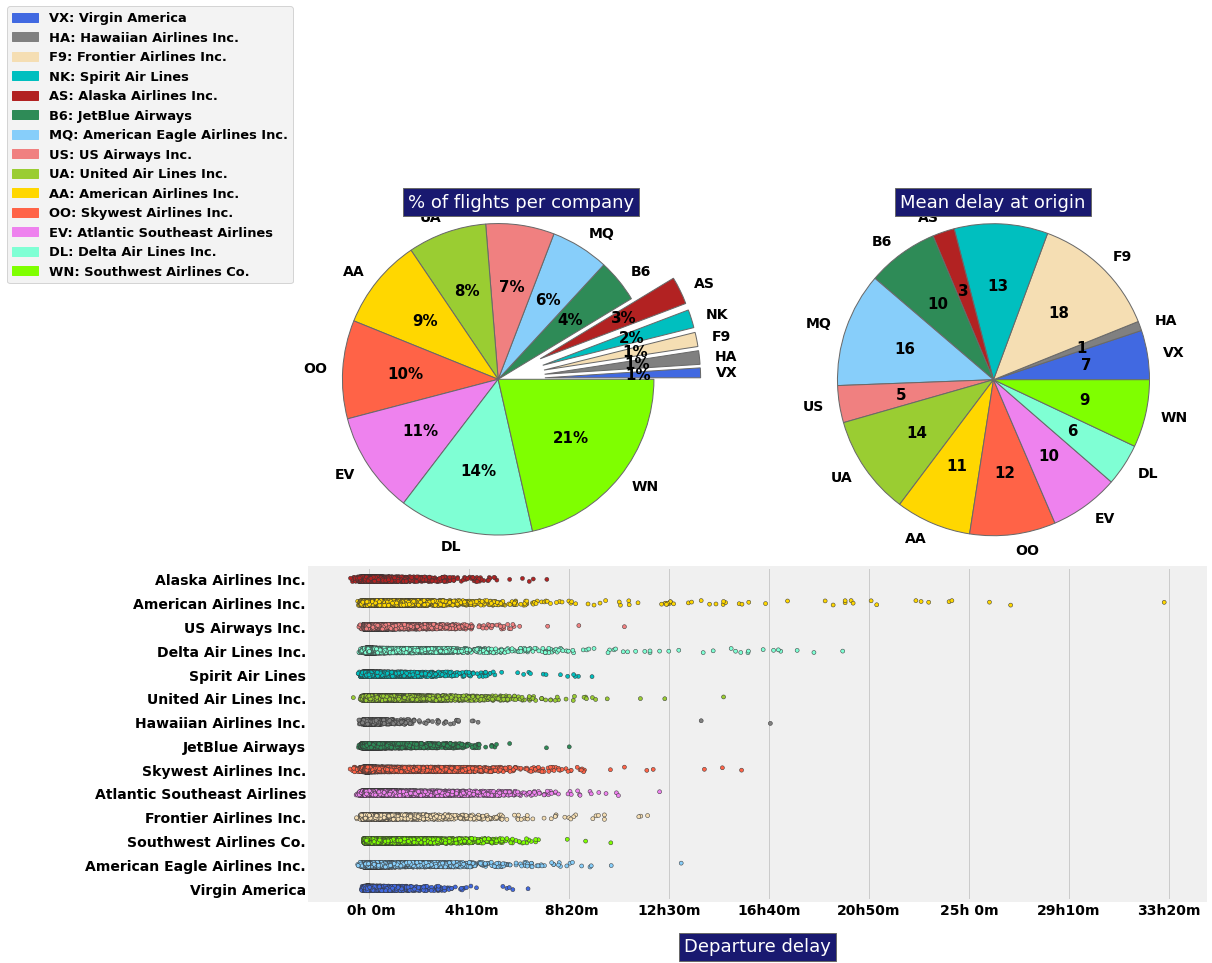

In [17]:
font = {'family' : 'normal', 'weight' : 'bold', 'size'   : 15}
mpl.rc('font', **font)
import matplotlib.patches as mpatches
#__________________________________________________________________
# extract a subset of columns and redefine the airlines labeling 
df2 = df.loc[:, ['AIRLINE', 'DEPARTURE_DELAY']]
df2['AIRLINE'] = df2['AIRLINE'].replace(abbr_companies)
#________________________________________________________________________
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']
#___________________________________
fig = plt.figure(1, figsize=(16,15))
gs=GridSpec(2,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 
ax3=fig.add_subplot(gs[1,:]) 
#------------------------------
# Pie chart n¬∫1: nb of flights
#------------------------------
labels = [s for s in  global_stats.index]
sizes  = global_stats['count'].values
explode = [0.3 if sizes[i] < 20000 else 0.0 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax1.axis('equal')
ax1.set_title('% of flights per company', bbox={'facecolor':'midnightblue', 'pad':5},
              color = 'w',fontsize=18)
#_______________________________________________
# set the legend: abreviation -> airline name
comp_handler = []
for i in range(len(abbr_companies)):
    comp_handler.append(mpatches.Patch(color=colors[i],
            label = global_stats.index[i] + ': ' + abbr_companies[global_stats.index[i]]))
ax1.legend(handles=comp_handler, bbox_to_anchor=(0.2, 0.9), 
           fontsize = 13, bbox_transform=plt.gcf().transFigure)
#----------------------------------------
# Pie chart n¬∫2: mean delay at departure
#----------------------------------------
sizes  = global_stats['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels,
                                colors = colors, shadow=False, startangle=0,
                                autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax2.axis('equal')
ax2.set_title('Mean delay at origin', bbox={'facecolor':'midnightblue', 'pad':5},
              color='w', fontsize=18)
#------------------------------------------------------
# striplot with all the values reported for the delays
#___________________________________________________________________
# redefine the colors for correspondance with the pie charts
colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']
#___________________________________________________________________
ax3 = sns.stripplot(y="AIRLINE", x="DEPARTURE_DELAY", size = 4, palette = colors,
                    data=df2, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax3.get_xticks()])
plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)
#________________________
plt.tight_layout(w_pad=3) 

Ta th·∫•y r·∫±ng m·∫∑c d√π t·∫•t c·∫£ c√°c tr∆∞·ªùng h·ª£p ch·∫≠m tr·ªÖ kho·∫£ng 10 ph√∫t, gi√° tr·ªã th·∫•p n√†y l√† h·ªá qu·∫£ c·ªßa th·ª±c t·∫ø l√† ph·∫ßn l·ªõn c√°c chuy·∫øn bay c·∫•t c√°nh ƒë√∫ng gi·ªù. Tuy nhi√™n, ta th·∫•y r·∫±ng ƒë√¥i khi, c√≥ th·ªÉ ph·∫£i ƒë·ªëi m·∫∑t v·ªõi ƒë·ªô tr·ªÖ l·ªõn, c√≥ th·ªÉ l√™n ƒë·∫øn v√†i ch·ª•c gi·ªù!
Th·ªÉ hi·ªán ƒë·ªô tr·ªÖ c√≥ th·ªÉ nh√¨n th·∫•y trong h√¨nh ti·∫øp theo:

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


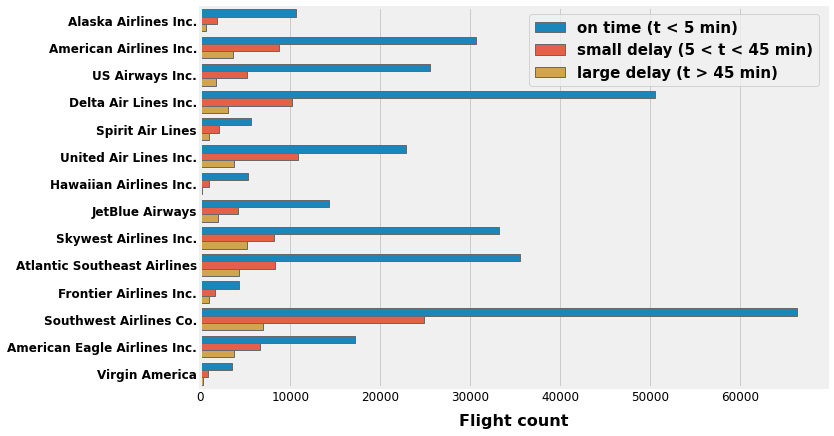

In [18]:
#_____________________________________________
# Function that define how delays are grouped
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
df['DELAY_LEVEL'] = df['DEPARTURE_DELAY'].apply(delay_type)
#____________________________________________________
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="AIRLINE", hue='DELAY_LEVEL', data=df)
#____________________________________________________________________________________
# thay th·∫ø c√°c ch·ªØ vi·∫øt t·∫Øt b·∫±ng t√™n ƒë·∫ßy ƒë·ªß c·ªßa c√°c c√¥ng ty v√† ƒë·∫∑t nh√£n
labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)
#________________
# Set the legend
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

Con s·ªë n√†y cho bi·∫øt s·ªë l·∫ßn tr·ªÖ d∆∞·ªõi 5 ph√∫t, tr·ªÖ trong kho·∫£ng 5 <t <45 ph√∫t v√† cu·ªëi c√πng l√† s·ªë l·∫ßn tr·ªÖ h∆°n 45 ph√∫t. Do ƒë√≥, ta c√≥ th·ªÉ nh·∫≠n ƒë·ªãnh r·∫±ng ƒë·ªô tr·ªÖ ƒë·ªôc l·∫≠p v·ªõi h√£ng h√†ng kh√¥ng, vi·ªác ch·∫≠m tr·ªÖ h∆°n 45 ph√∫t ch·ªâ chi·∫øm m·ªôt v√†i ph·∫ßn trƒÉm. Tuy nhi√™n, t·ª∑ l·ªá ch·∫≠m tr·ªÖ trong ba nh√≥m n√†y ph·ª• thu·ªôc v√†o h√£ng h√†ng kh√¥ng: nh∆∞ m·ªôt v√≠ d·ª•, trong tr∆∞·ªùng h·ª£p
*SkyWest Airlines*, c√°c tr∆∞·ªùng h·ª£p ch·∫≠m tr·ªÖ h∆°n 45 ph√∫t ch·ªâ th·∫•p h∆°n 30% ƒë·ªëi v·ªõi c√°c tr∆∞·ªùng h·ª£p ch·∫≠m tr·ªÖ trong kho·∫£ng 5 <t <45 ph√∫t. M·ªçi th·ª© t·ªët h∆°n cho *SoutWest Airlines* v√¨ c√°c chuy·∫øn bay ch·∫≠m h∆°n 45 ph√∫t √≠t th∆∞·ªùng xuy√™n h∆°n 4 l·∫ßn so v·ªõi c√°c chuy·∫øn bay trong kho·∫£ng 5 <t <45 ph√∫t.


### 2.2 Ph√¢n b·ªë ƒë·ªô tr·ªÖ
- Trong ph·∫ßn n√†y, ta xem x√©t chi ti·∫øt h∆°n v·ªÅ vi·ªác ph√¢n b·ªï s·ª± ch·∫≠m tr·ªÖ c·ªßa m·ªçi h√£ng h√†ng kh√¥ng:

___
## 3. Delays: take-off or landing ?

- Trong ph·∫ßn tr∆∞·ªõc, t·∫•t c·∫£ c√°c cu·ªôc th·∫£o lu·∫≠n ƒë√£ ƒë∆∞·ª£c th·ª±c hi·ªán v·ªÅ s·ª± ch·∫≠m tr·ªÖ kh·ªüi h√†nh. Tuy nhi√™n, nh·ªØng s·ª± ch·∫≠m tr·ªÖ n√†y h∆°i kh√°c so v·ªõi nh·ªØng s·ª± ch·∫≠m tr·ªÖ ƒë∆∞·ª£c ghi nh·∫≠n khi ƒë·∫øn:

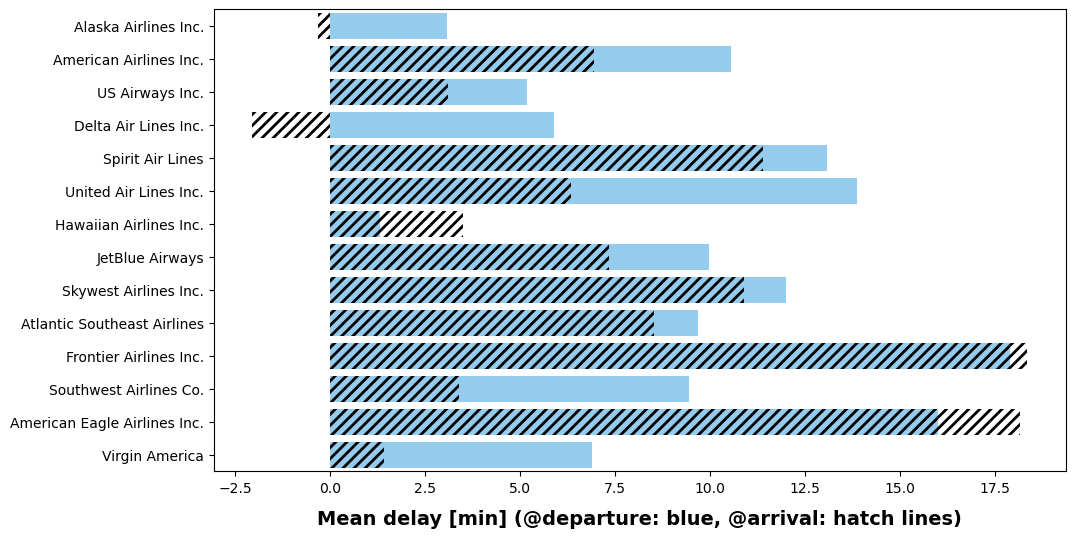

In [19]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.0  

fig = plt.figure(1, figsize=(11,6))
ax = sns.barplot(x="DEPARTURE_DELAY", y="AIRLINE", data=df, color="lightskyblue", ci=None)
ax = sns.barplot(x="ARRIVAL_DELAY", y="AIRLINE", data=df, color="r", hatch = '///',
                 alpha = 0.0, ci=None)
labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
ax.yaxis.label.set_visible(False)
plt.xlabel('Mean delay [min] (@departure: blue, @arrival: hatch lines)',
           fontsize=14, weight = 'bold', labelpad=10);

- Tr√™n h√¨nh n√†y, ch√∫ng ta c√≥ th·ªÉ th·∫•y r·∫±ng s·ª± ch·∫≠m tr·ªÖ khi ƒë·∫øn th∆∞·ªùng th·∫•p h∆°n l√∫c kh·ªüi h√†nh. ƒêi·ªÅu n√†y cho th·∫•y c√°c h√£ng h√†ng kh√¥ng ƒëi·ªÅu ch·ªânh t·ªëc ƒë·ªô chuy·∫øn bay c·ªßa h·ªç ƒë·ªÉ gi·∫£m s·ª± ch·∫≠m tr·ªÖ khi ƒë·∫øn. Trong ph·∫ßn ti·∫øp theo, ta s·∫Ω ch·ªâ xem x√©t s·ª± ch·∫≠m tr·ªÖ khi kh·ªüi h√†nh.

___
## 4. M·ªëi quan h·ªá gi·ªØa "ORIGIN_AIRPORT" v√† ƒë·ªô tr·ªÖ

- B√¢y gi·ªù ta s·∫Ω c·ªë g·∫Øng x√°c ƒë·ªãnh xem c√≥ m·ªëi t∆∞∆°ng quan gi·ªØa ƒë·ªô tr·ªÖ v√† s√¢n bay xu·∫•t ph√°t hay kh√¥ng.S·ªë l∆∞·ª£ng s√¢n bay ƒë∆∞·ª£c xem x√©t l√†:

In [20]:
print("Nb of airports: {}".format(len(df['ORIGIN_AIRPORT'].unique())))

Nb of airports: 312



### 4.1 Khu v·ª±c ƒë·ªãa l√Ω c·ªßa c√°c h√£ng h√†ng kh√¥ng
·ªû ƒë√¢y, ta xem nhanh qua v·ªÅ s·ªë l∆∞·ª£ng s√¢n bay ƒë·∫øn c·ªßa m·ªói h√£ng h√†ng kh√¥ng:


In [21]:
origin_nb = dict()
for carrier in abbr_companies.keys():
    liste_origin_airport = df[df['AIRLINE'] == carrier]['ORIGIN_AIRPORT'].unique()
    origin_nb[carrier] = len(liste_origin_airport)

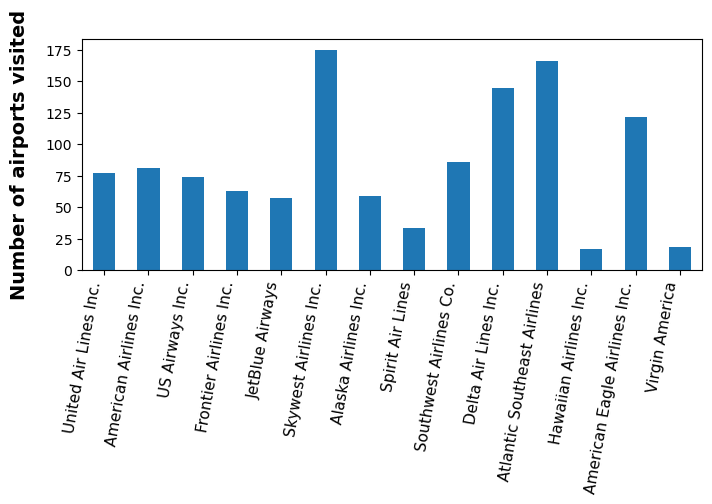

In [22]:
test_df = pd.DataFrame.from_dict(origin_nb, orient='index')
test_df.rename(columns = {0:'count'}, inplace = True)
ax = test_df.plot(kind='bar', figsize = (8,3))
labels = [abbr_companies[item.get_text()] for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.ylabel('Number of airports visited', fontsize=14, weight = 'bold', labelpad=12)
plt.setp(ax.get_xticklabels(), fontsize=11, ha = 'right', rotation = 80)
ax.legend().set_visible(False)
plt.show()

In [23]:
temp = pd.read_csv('airports.csv')
identify_airport = temp.set_index('IATA_CODE')['CITY'].to_dict()
latitude_airport = temp.set_index('IATA_CODE')['LATITUDE'].to_dict()
longitude_airport = temp.set_index('IATA_CODE')['LONGITUDE'].to_dict()

___
### 4.2 C√°ch y·∫øu t·ªë "ORIGIN_AIRPORT" t√°c ƒë·ªông ƒë·∫øn ƒë·ªô tr·ªÖ

- Trong ph·∫ßn n√†y, Ta s·∫Ω xem x√©t c√°c bi·∫øn th·ªÉ c·ªßa s·ª± ch·∫≠m tr·ªÖ ƒë·ªëi v·ªõi s√¢n bay xu·∫•t ph√°t v√† ƒë·ªëi v·ªõi m·ªçi h√£ng h√†ng kh√¥ng. Do ƒë√≥, b∆∞·ªõc ƒë·∫ßu ti√™n bao g·ªìm x√°c ƒë·ªãnh ƒë·ªô tr·ªÖ trung b√¨nh cho m·ªói s√¢n bay:

In [24]:
airport_mean_delays = pd.DataFrame(pd.Series(df['ORIGIN_AIRPORT'].unique()))
airport_mean_delays.set_index(0, drop = True, inplace = True)

for carrier in abbr_companies.keys():
    df1 = df[df['AIRLINE'] == carrier]
    test = df1['DEPARTURE_DELAY'].groupby(df['ORIGIN_AIRPORT']).apply(get_stats).unstack()
    airport_mean_delays[carrier] = test.loc[:, 'mean'] 

- V√¨ s·ªë l∆∞·ª£ng s√¢n bay kh√° l·ªõn n√™n m·ªôt bi·ªÉu ƒë·ªì hi·ªÉn th·ªã t·∫•t c·∫£ th√¥ng tin c√πng m·ªôt l√∫c s·∫Ω h∆°i l·ªôn x·ªôn, v√¨ n√≥ s·∫Ω ƒë·∫°i di·ªán cho kho·∫£ng 4400 gi√° tr·ªã (t·ª©c l√† 312 s√¢n bay √ó
√ó
   14 h√£ng h√†ng kh√¥ng). Do ƒë√≥, ta ch·ªâ cho m·ªôt t·∫≠p h·ª£p con ƒë·∫°i di·ªán cho d·ªØ li·ªáu:

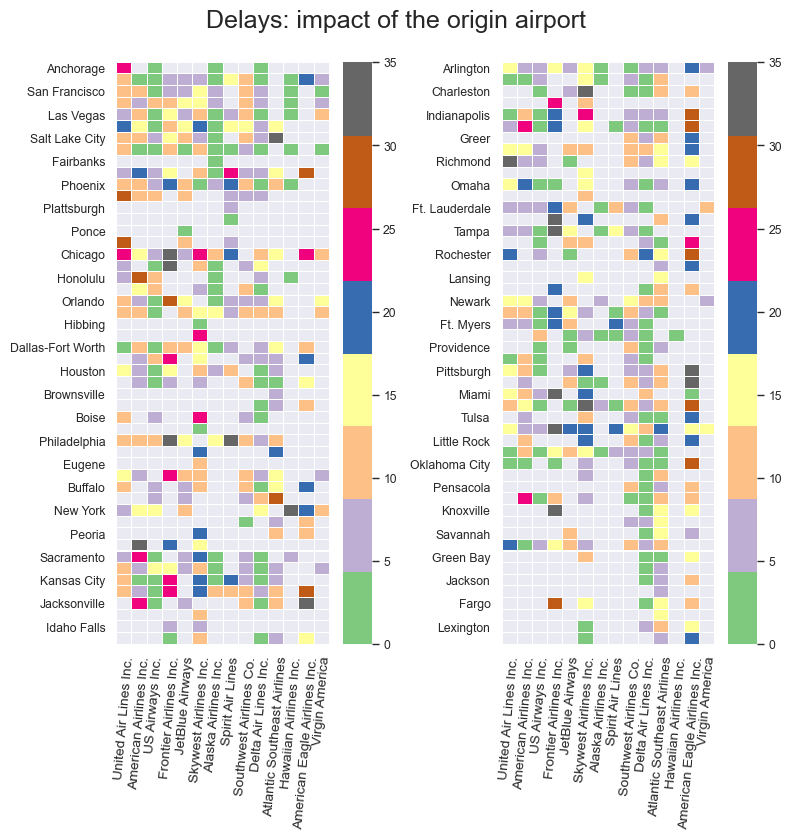

In [25]:
sns.set(context="paper")
fig = plt.figure(1, figsize=(8,8))

ax = fig.add_subplot(1,2,1)
subset = airport_mean_delays.iloc[:50,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85) ;
ax.yaxis.label.set_visible(False)

ax = fig.add_subplot(1,2,2)    
subset = airport_mean_delays.iloc[50:100,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
fig.text(0.5, 1.02, "Delays: impact of the origin airport", ha='center', fontsize = 18)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85) ;
ax.yaxis.label.set_visible(False)

plt.tight_layout()

___
### 4.3 C√°c chuy·∫øn bay c√≥ ƒë·ªô tr·ªÖ b·∫•t th∆∞·ªùng  ?

- Trong ph·∫ßn tr∆∞·ªõc, ch√∫ng ta ƒë√£ th·∫•y r·∫±ng c√≥ s·ª± kh√°c nhau v·ªÅ s·ª± ch·∫≠m tr·ªÖ khi xem x√©t c√°c h√£ng h√†ng kh√¥ng kh√°c nhau v√† c√°c s√¢n bay xu·∫•t ph√°t kh√°c nhau. B√¢y gi·ªù ta s·∫Ω th√™m m·ªôt m·ª©c ƒë·ªô chi ti·∫øt b·∫±ng c√°ch kh√¥ng ch·ªâ t·∫≠p trung v√†o c√°c s√¢n bay ban ƒë·∫ßu m√† c√≤n v√†o c√°c chuy·∫øn bay: N∆°i b·∫Øt ƒë·∫ßu ‚Üí‚ÜíN∆°i ƒê·∫øn. M·ª•c ti√™u ·ªü ƒë√¢y l√† ƒë·ªÉ xem li·ªáu m·ªôt s·ªë chuy·∫øn bay c√≥ b·ªã tr√¨ ho√£n m·ªôt c√°ch c√≥ h·ªá th·ªëng hay kh√¥ng ho·∫∑c ng∆∞·ª£c l·∫°i, c√≥ nh·ªØng chuy·∫øn bay lu√¥n ƒë√∫ng gi·ªù.
Sau ƒë√¢y, t√¥i xem x√©t tr∆∞·ªùng h·ª£p c·ªßa m·ªôt h√£ng h√†ng kh√¥ng. Ta li·ªát k√™ t·∫•t c·∫£ c√°c chuy·∫øn bay A ‚Üí
‚Üí
   B ƒë∆∞·ª£c th·ª±c hi·ªán b·ªüi c√¥ng ty n√†y v√† ƒë·ªëi v·ªõi m·ªói trong s·ªë ch√∫ng, ta t·∫°o danh s√°ch ƒë·ªô tr·ªÖ ƒë√£ ƒë∆∞·ª£c record:

In [26]:
#_________________________________________________________________
# Ta ch·ªçn m·ªôt c√¥ng ti v√† t·∫°o dataframe con c·ªßa n√≥
carrier = 'AA'
df1 = df[df['AIRLINE']==carrier][['ORIGIN_AIRPORT','DESTINATION_AIRPORT','DEPARTURE_DELAY']]
#___________________________________________________________
# thu th·∫≠p c√°c tuy·∫øn bay v√† li·ªát k√™  ƒë·ªô tr·ªÖ cho m·ªói tuy·∫øn
trajet = dict()
for ind, col in df1.iterrows():
    if pd.isnull(col['DEPARTURE_DELAY']): continue
    route = str(col['ORIGIN_AIRPORT'])+'-'+str(col['DESTINATION_AIRPORT'])
    if route in trajet.keys():
        trajet[route].append(col['DEPARTURE_DELAY'])
    else:
        trajet[route] = [col['DEPARTURE_DELAY']]
#____________________________________________________________________        
# chuy·ªÉn dic trong danh s√°ch ƒë·ªÉ s·∫Øp x·∫øp c√°c tuy·∫øn ƒë∆∞·ªùng theo s√¢n bay ƒëi
liste_trip = []
for key, value in trajet.items():
    liste_trip.append([key, value])
liste_trip.sort()

- Sau ƒë√≥, ta t√≠nh to√°n ƒë·ªô tr·ªÖ trung b√¨nh tr√™n c√°c tuy·∫øn bay kh√°c nhau A ‚Üí
‚Üí
   B, c≈©ng nh∆∞ ƒë·ªô l·ªách chu·∫©n v√† sau khi ho√†n t·∫•t, t·∫°o m·ªôt bi·ªÉu di·ªÖn (cho m·ªôt m·∫´u c√°c chuy·∫øn bay):


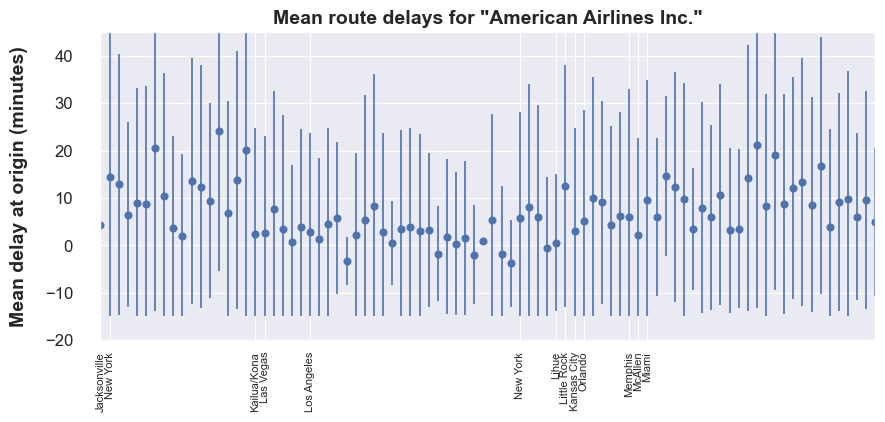

In [27]:
mean_val = [] ; std_val = [] ; x_label = []

i = 0
for route, liste_late in liste_trip:
    #_____________________________________________
    # I set the labels as the airport from origin
    index = route.split('-')[0]
    x_label.append(identify_airport[index])
    #______________________________________________________________________________
    # I put a threshold on delays to prevent that high values take too much weight
    trip2 = [min(90, s) for s in liste_late]
    #________________________________________
    # I compute mean and standard deviations
    mean_val.append(scipy.mean(trip2))
    std_val.append(scipy.std(trip2))
    i += 1
#________________
# Plot the graph
fig, ax = plt.subplots(figsize=(10,4))
std_min = [ min(15 + mean_val[i], s) for i,s in enumerate(std_val)] 
ax.errorbar(list(range(i)), mean_val, yerr = [std_min, std_val], fmt='o') 
ax.set_title('Mean route delays for "{}"'.format(abbr_companies[carrier]),
             fontsize=14, weight = 'bold')
plt.ylabel('Mean delay at origin (minutes)', fontsize=14, weight = 'bold', labelpad=12)
#___________________________________________________
# I define the x,y range and positions of the ticks
imin, imax = 145, 230
plt.xlim(imin, imax) ; plt.ylim(-20, 45)
liste_ticks = [imin]
for j in range(imin+1,imax):
    if x_label[j] == x_label[j-1]: continue
    liste_ticks.append(j)
#_____________________________
# and set the tick parameters  
ax.set_xticks(liste_ticks)
ax.set_xticklabels([x_label[int(x)] for x in ax.get_xticks()], rotation = 90, fontsize = 8)
plt.setp(ax.get_yticklabels(), fontsize=12, rotation = 0)
ax.tick_params(axis='y', which='major', pad=15)

plt.show()

- Con s·ªë n√†y cho bi·∫øt m·ª©c ƒë·ªô ch·∫≠m tr·ªÖ trung b√¨nh c·ªßa American Airlines, theo th√†nh ph·ªë xu·∫•t ph√°t v√† ƒëi·ªÉm ƒë·∫øn (l∆∞u √Ω r·∫±ng tr√™n tr·ª•c abscissa, ch·ªâ c√≥ ƒëi·ªÉm xu·∫•t ph√°t ƒë∆∞·ª£c ch·ªâ ra ƒë·ªÉ r√µ r√†ng). C√°c thanh ƒë∆∞·ª£c li√™n k·∫øt v·ªõi c√°c ƒë∆∞·ªùng d·∫´n kh√°c nhau t∆∞∆°ng ·ª©ng v·ªõi ƒë·ªô l·ªách chu·∫©n. Trong v√≠ d·ª• n√†y, c√≥ th·ªÉ th·∫•y r·∫±ng ƒë·ªëi v·ªõi m·ªôt s√¢n bay xu·∫•t ph√°t nh·∫•t ƒë·ªãnh, ƒë·ªô tr·ªÖ s·∫Ω dao ƒë·ªông t√πy thu·ªôc v√†o ƒëi·ªÉm ƒë·∫øn. V√≠ d·ª•, ch√∫ng ta th·∫•y r·∫±ng ·ªü ƒë√¢y c√°c bi·∫øn th·ªÉ l·ªõn nh·∫•t thu ƒë∆∞·ª£c cho New York ho·∫∑c Miami, n∆°i m√† ƒë·ªô tr·ªÖ trung b√¨nh ban ƒë·∫ßu thay ƒë·ªïi t·ª´ 0 ƒë·∫øn ‚àº‚àº20 ph√∫t.
___
## 4. S·ª± thay ƒë·ªïi theo th·ªùi gian c·ªßa ƒë·ªô tr·ªÖ

- Trong ph·∫ßn n√†y, ta xem x√©t c√°ch th·ª©c m√† ƒë·ªô tr·ªÖ thay ƒë·ªïi theo th·ªùi gian. Xem x√©t tr∆∞·ªùng h·ª£p c·ªßa m·ªôt h√£ng h√†ng kh√¥ng v√† s√¢n bay c·ª• th·ªÉ, s·ª± ch·∫≠m tr·ªÖ c√≥ th·ªÉ d·ªÖ d√†ng ƒë∆∞·ª£c bi·ªÉu th·ªã theo ng√†y v√† gi·ªù (_aside_: tr∆∞·ªõc khi l√†m ƒëi·ªÅu n√†y, ta x√°c ƒë·ªãnh m·ªôt l·ªõp m√† ta s·∫Ω s·ª≠ d·ª•ng nhi·ªÅu ƒë·ªÉ t·∫°o bi·ªÉu ƒë·ªì):

In [28]:
class Figure_style():
    #_________________________________________________________________
    def __init__(self, size_x = 11, size_y = 5, nrows = 1, ncols = 1):
        sns.set_style("white")
        sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})
        self.fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize=(size_x,size_y,))
        #________________________________
        # convert self.axs to 2D array
        if nrows == 1 and ncols == 1:
            self.axs = np.reshape(axs, (1, -1))
        elif nrows == 1:
            self.axs = np.reshape(axs, (1, -1))
        elif ncols == 1:
            self.axs = np.reshape(axs, (-1, 1))
    #_____________________________
    def pos_update(self, ix, iy):
        self.ix, self.iy = ix, iy
    #_______________
    def style(self):
        self.axs[self.ix, self.iy].spines['right'].set_visible(False)
        self.axs[self.ix, self.iy].spines['top'].set_visible(False)
        self.axs[self.ix, self.iy].yaxis.grid(color='lightgray', linestyle=':')
        self.axs[self.ix, self.iy].xaxis.grid(color='lightgray', linestyle=':')
        self.axs[self.ix, self.iy].tick_params(axis='both', which='major',
                                               labelsize=10, size = 5)
    #________________________________________
    def draw_legend(self, location='upper right'):
        legend = self.axs[self.ix, self.iy].legend(loc = location, shadow=True,
                                        facecolor = 'g', frameon = True)
        legend.get_frame().set_facecolor('whitesmoke')
    #_________________________________________________________________________________
    def cust_plot(self, x, y, color='b', linestyle='-', linewidth=1, marker=None, label=''):
        if marker:
            markerfacecolor, marker, markersize = marker[:]
            self.axs[self.ix, self.iy].plot(x, y, color = color, linestyle = linestyle,
                                linewidth = linewidth, marker = marker, label = label,
                                markerfacecolor = markerfacecolor, markersize = markersize)
        else:
            self.axs[self.ix, self.iy].plot(x, y, color = color, linestyle = linestyle,
                                        linewidth = linewidth, label=label)
        self.fig.autofmt_xdate()
    #________________________________________________________________________
    def cust_plot_date(self, x, y, color='lightblue', linestyle='-',
                       linewidth=1, markeredge=False, label=''):
        markeredgewidth = 1 if markeredge else 0
        self.axs[self.ix, self.iy].plot_date(x, y, color='lightblue', markeredgecolor='grey',
                                  markeredgewidth = markeredgewidth, label=label)
    #________________________________________________________________________
    def cust_scatter(self, x, y, color = 'lightblue', markeredge = False, label=''):
        markeredgewidth = 1 if markeredge else 0
        self.axs[self.ix, self.iy].scatter(x, y, color=color,  edgecolor='grey',
                                  linewidths = markeredgewidth, label=label)    
    #___________________________________________
    def set_xlabel(self, label, fontsize = 14):
        self.axs[self.ix, self.iy].set_xlabel(label, fontsize = fontsize)
    #___________________________________________
    def set_ylabel(self, label, fontsize = 14):
        self.axs[self.ix, self.iy].set_ylabel(label, fontsize = fontsize)
    #____________________________________
    def set_xlim(self, lim_inf, lim_sup):
        self.axs[self.ix, self.iy].set_xlim([lim_inf, lim_sup])
    #____________________________________
    def set_ylim(self, lim_inf, lim_sup):
        self.axs[self.ix, self.iy].set_ylim([lim_inf, lim_sup])           

In [29]:
carrier = 'WN'
id_airport = 4
liste_origin_airport = df[df['AIRLINE'] == carrier]['ORIGIN_AIRPORT'].unique()
df2 = df[(df['AIRLINE'] == carrier) & (df['ARRIVAL_DELAY'] > 0)
         & (df['ORIGIN_AIRPORT'] == liste_origin_airport[id_airport])]
df2.sort_values('SCHEDULED_DEPARTURE', inplace = True)

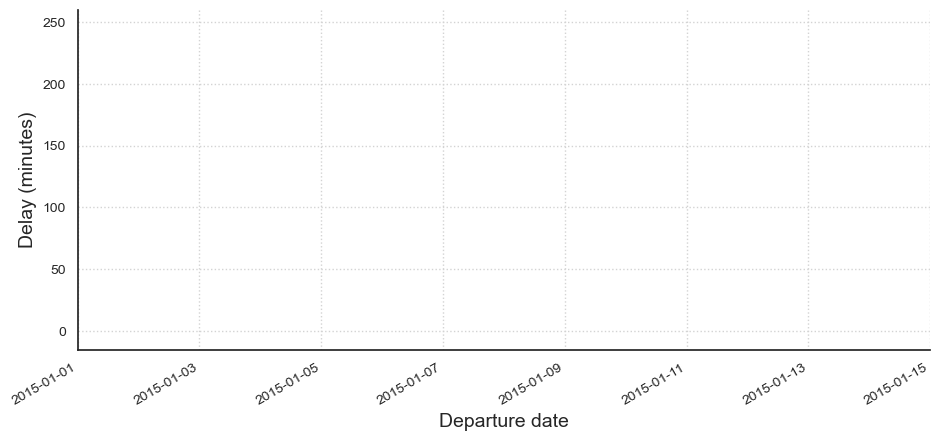

In [30]:
fig1 = Figure_style(11, 5, 1, 1)
fig1.pos_update(0, 0)
fig1.cust_plot(df2['SCHEDULED_DEPARTURE'], df2['DEPARTURE_DELAY'], linestyle='-')
fig1.style() 
fig1.set_ylabel('Delay (minutes)', fontsize = 14)
fig1.set_xlabel('Departure date', fontsize = 14)
date_1 = datetime.datetime(2015,1,1)
date_2 = datetime.datetime(2015,1,15)
fig1.set_xlim(date_1, date_2)
fig1.set_ylim(-15, 260)


- H√¨nh n√†y cho th·∫•y s·ª± t·ªìn t·∫°i c·ªßa c√°c chu k·ª≥, c·∫£ v·ªÅ t·∫ßn s·ªë c·ªßa s·ª± ch·∫≠m tr·ªÖ c≈©ng nh∆∞ ƒë·ªô l·ªõn c·ªßa ch√∫ng. Tr√™n th·ª±c t·∫ø, theo tr·ª±c gi√°c, c√≥ v·∫ª kh√° h·ª£p l√Ω khi quan s√°t c√°c chu k·ª≥ nh∆∞ v·∫≠y v√¨ ch√∫ng s·∫Ω l√† h·ªá qu·∫£ c·ªßa s·ª± lu√¢n phi√™n gi·ªØa ng√†y v√† ƒë√™m v√† th·ª±c t·∫ø l√† ho·∫°t ƒë·ªông c·ªßa s√¢n bay s·∫Ω gi·∫£m ƒë√°ng k·ªÉ (n·∫øu kh√¥ng mu·ªën n√≥i l√† kh√¥ng t·ªìn t·∫°i) v√†o ban ƒë√™m. ƒêi·ªÅu n√†y cho th·∫•y r·∫±ng m·ªôt bi·∫øn s·ªë quan tr·ªçng trong m√¥ h√¨nh h√≥a ƒë·ªô tr·ªÖ s·∫Ω l√† th·ªùi gian c·∫•t c√°nh. ƒê·ªÉ ki·ªÉm tra gi·∫£ thuy·∫øt n√†y, t√¥i xem x√©t h√†nh vi c·ªßa ƒë·ªô tr·ªÖ trung b√¨nh nh∆∞ m·ªôt h√†m c·ªßa th·ªùi gian kh·ªüi h√†nh, t·ªïng h·ª£p d·ªØ li·ªáu c·ªßa th√°ng hi·ªán t·∫°i:

In [31]:
#_______________________________
def func2(x, a, b, c):
    return a * x**2 +  b*x + c
#_______________________________
df2['hours_depart'] =  df2['SCHEDULED_DEPARTURE'].apply(lambda x:x.time())
test2 = df2['DEPARTURE_DELAY'].groupby(df2['hours_depart']).apply(get_stats).unstack()
fct = lambda x:x.hour*3600+x.minute*60+x.second
x_val = np.array([fct(s) for s in test2.index]) 
y_val = test2['mean']
popt, pcov = curve_fit(func2, x_val, y_val, p0 = [1, 2, 3])
test2['fit'] = pd.Series(func2(x_val, *popt), index = test2.index)

tr·ª±c quan c√≥ ƒë∆∞·ª£c:

ConversionError: Failed to convert value(s) to axis units: array([datetime.time(6, 50), datetime.time(8, 45), datetime.time(9, 55),
       ..., datetime.time(19, 50), datetime.time(19, 50),
       datetime.time(19, 50)], dtype=object)

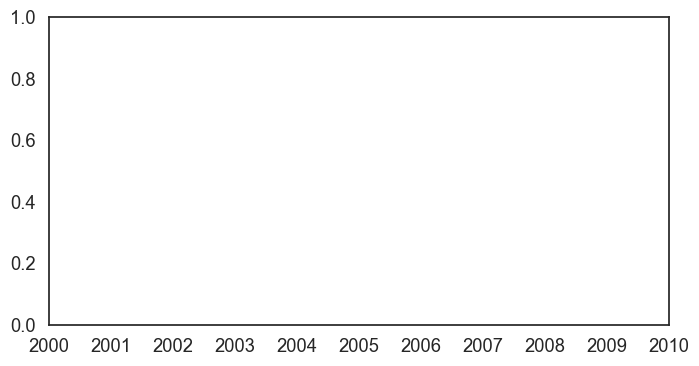

In [32]:
fig1 = Figure_style(8, 4, 1, 1)
fig1.pos_update(0, 0)
fig1.cust_plot_date(df2['hours_depart'], df2['DEPARTURE_DELAY'],
                    markeredge=False, label='initial data points')
fig1.cust_plot(test2.index, test2['mean'], linestyle='--', linewidth=2, label='mean')
fig1.cust_plot(test2.index, test2['fit'], color='r', linestyle='-', linewidth=3, label='fit')
fig1.style() ; fig1.draw_legend('upper left')
fig1.set_ylabel('Delay (minutes)', fontsize = 14)
fig1.set_xlabel('Departure time', fontsize = 14)
fig1.set_ylim(-15, 210)


- ·ªû ƒë√¢y, ch√∫ng ta c√≥ th·ªÉ th·∫•y r·∫±ng ƒë·ªô tr·ªÖ trung b√¨nh c√≥ xu h∆∞·ªõng tƒÉng l√™n theo th·ªùi gian kh·ªüi h√†nh trong ng√†y: chuy·∫øn bay kh·ªüi h√†nh ƒë√∫ng gi·ªù v√†o bu·ªïi s√°ng v√† th·ªùi gian tr·ªÖ tƒÉng g·∫ßn nh∆∞ ƒë∆°n ƒëi·ªáu l√™n ƒë·∫øn 30 ph√∫t v√†o cu·ªëi ng√†y. Tr√™n th·ª±c t·∫ø, h√†nh vi n√†y kh√° chung chung v√† nh√¨n v√†o c√°c s√¢n bay ho·∫∑c c√¥ng ty kh√°c, ch√∫ng ta s·∫Ω t√¨m th·∫•y xu h∆∞·ªõng t∆∞∆°ng t·ª±.

___
## 6. Predicting flight delays 

- C√°c ph·∫ßn tr∆∞·ªõc x·ª≠ l√Ω vi·ªác kh√°m ph√° t·∫≠p d·ªØ li·ªáu. ·ªû ƒë√¢y, ta b·∫Øt ƒë·∫ßu v·ªõi vi·ªác m√¥ h√¨nh h√≥a ƒë·ªô tr·ªÖ chuy·∫øn bay. Trong ph·∫ßn n√†y, m·ª•c ti√™u l√† t·∫°o ra m·ªôt m√¥ h√¨nh s·ª≠ d·ª•ng th·ªùi h·∫°n 3 tu·∫ßn ƒë·ªÉ d·ª± ƒëo√°n s·ª± ch·∫≠m tr·ªÖ c·ªßa tu·∫ßn ti·∫øp theo. Do ƒë√≥, ch√∫ng ta quy·∫øt ƒë·ªãnh s·∫Ω l√†m vi·ªác tr√™n d·ªØ li·ªáu c·ªßa th√°ng 1 v·ªõi m·ª•c ƒë√≠ch d·ª± ƒëo√°n ƒë·ªô tr·ªÖ c·ªßa ng√†y 23 ƒë·∫øn ng√†y 31

In [33]:
df_train = df[df['SCHEDULED_DEPARTURE'].apply(lambda x:x.date()) < datetime.date(2019, 1, 23)]
df_test  = df[df['SCHEDULED_DEPARTURE'].apply(lambda x:x.date()) > datetime.date(2019, 1, 23)]
df = df_train

___
### 5.1 Model n¬∫1: one airline, one airport


#### 5.1.1 Pitfalls <br>


**a) Unsufficient statistics**


Tr∆∞·ªõc h·∫øt, ta xem x√©t c√°c chuy·∫øn bay c·ªßa * American Airlines * v√† th·ª±c hi·ªán m·ªôt cu·ªôc ƒëi·ªÅu tra s·ªë l∆∞·ª£ng c√°c chuy·∫øn bay ƒë√£ r·ªùi kh·ªèi m·ªói s√¢n bay:

In [34]:
carrier = 'AA'
check_airports = df[(df['AIRLINE'] == carrier)]['DEPARTURE_DELAY'].groupby(
                         df['ORIGIN_AIRPORT']).apply(get_stats).unstack()
check_airports.sort_values('count', ascending = False, inplace = True)
check_airports[-5:]

min    max  count       mean
ORIGIN_AIRPORT                               
JAC            -19.0   47.0   25.0  -3.640000
GUC            -24.0  199.0   22.0  13.227273
SDF             -8.0   55.0   19.0   8.421053
LIT             -5.0   74.0    9.0  12.555556
MTJ             -2.0   51.0    3.0  26.000000

- Nh√¨n v√†o danh s√°ch n√†y, ch√∫ng ta c√≥ th·ªÉ th·∫•y r·∫±ng nh·ªØng s√¢n bay √≠t ƒë∆∞·ª£c gh√© thƒÉm h∆°n, ch·ªâ c√≥ m·ªôt v√†i chuy·∫øn bay trong m·ªôt th√°ng. V√¨ v·∫≠y, trong tr∆∞·ªùng h·ª£p k√©m thu·∫≠n l·ª£i nh·∫•t, kh√¥ng th·ªÉ th·ª±c hi·ªán m·ªôt h·ªìi quy.

**b) Extreme delays**

- M·ªôt l·ªói c·∫ßn tr√°nh l√† ƒë·ªô tr·ªÖ "b·∫•t ng·ªù": c·∫ßn ƒë·∫∑c bi·ªát ch√∫ √Ω ƒë·∫øn c√°c ƒë·ªô tr·ªÖ qu√° l·ªõn. Th·∫≠t v·∫≠y, trong qu√° tr√¨nh thƒÉm d√≤, ta th·∫•y r·∫±ng th·ªânh tho·∫£ng c√≥ th·ªÉ ghi nh·∫≠n ƒë∆∞·ª£c s·ª± ch·∫≠m tr·ªÖ v√†i gi·ªù (th·∫≠m ch√≠ h√†ng ch·ª•c gi·ªù). Tuy nhi√™n, lo·∫°i ch·∫≠m tr·ªÖ n√†y l√† r·∫•t nh·ªè (m·ªôt v√†i%) v√† nguy√™n nh√¢n c·ªßa nh·ªØng s·ª± ch·∫≠m tr·ªÖ n√†y c√≥ th·ªÉ li√™n quan ƒë·∫øn c√°c s·ª± ki·ªán kh√¥ng th·ªÉ ƒëo√°n tr∆∞·ªõc (th·ªùi ti·∫øt, s·ª± c·ªë, tai n·∫°n, ...). M·∫∑t kh√°c, t√≠nh ƒë·∫øn s·ª± ch·∫≠m tr·ªÖ ki·ªÉu n√†y c√≥ th·ªÉ s·∫Ω d·∫´n ƒë·∫øn sai l·ªách trong ph√¢n t√≠ch. H∆°n n·ªØa, tr·ªçng s·ªë c·ªßa c√°c gi√° tr·ªã l·ªõn s·∫Ω r·∫•t ƒë√°ng k·ªÉ n·∫øu ch√∫ng ta c√≥ m·ªôt th·ªëng k√™ nh·ªè.

ƒê·ªÉ minh h·ªça ƒëi·ªÅu n√†y, tr∆∞·ªõc ti√™n ta ƒë·ªãnh nghƒ©a m·ªôt h√†m t√≠nh to√°n ƒë·ªô tr·ªÖ chuy·∫øn bay trung b√¨nh cho m·ªói h√£ng h√†ng kh√¥ng v√† m·ªói s√¢n bay:

In [39]:
def get_flight_delays(df, carrier, id_airport, extrem_values = False):
    df2 = df[(df['AIRLINE'] == carrier) & (df['ORIGIN_AIRPORT'] == id_airport)]
    #_______________________________________
    # xo√° ƒëi nh·ªØng gi√° tr·ªã q√∫a l·ªõn tr∆∞·ªõc khi fitting
    if extrem_values:
        df2['DEPARTURE_DELAY'] = df2['DEPARTURE_DELAY'].apply(lambda x:x if x < 60 else np.nan)
        df2.dropna(how = 'any')
    #__________________________________
    # chuy·ªÉn ƒë·ªïi: ng√†y + gi·ªù - > gi·ªù
    df2.sort_values('SCHEDULED_DEPARTURE', inplace = True)
    df2['hours_depart'] =  df2['SCHEDULED_DEPARTURE'].apply(lambda x:x.time())
    #___________________________________________________________________
    # ph√¢n nh√≥m c√°c chuy·∫øn bay theo th·ªùi gian kh·ªüi h√†nh v√† t√≠nh gi√° tr·ªã trung b√¨nh
    test2 = df2['DEPARTURE_DELAY'].groupby(df2['hours_depart']).apply(get_stats).unstack()
    test2.reset_index(inplace=True)
    #___________________________________
    
    fct = lambda x:x.hour*3600+x.minute*60+x.second
    test2.reset_index(inplace=True)
    test2['hours_depart_min'] = test2['hours_depart'].apply(fct)
    return test2

- v√† sau ƒë√≥ l√† m·ªôt h√†m th·ª±c hi·ªán h·ªìi quy tuy·∫øn t√≠nh tr√™n c√°c gi√° tr·ªã sau:

In [40]:
def linear_regression(test2):
    test = test2[['mean', 'hours_depart_min']].dropna(how='any', axis = 0)
    X = np.array(test['hours_depart_min'])
    Y = np.array(test['mean'])
    X = X.reshape(len(X),1)
    Y = Y.reshape(len(Y),1)
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)
    result = regr.predict(X)
    return X, Y, result

- Sau ƒë√≥ ta xem x√©t hai k·ªãch b·∫£n. Trong tr∆∞·ªùng h·ª£p ƒë·∫ßu ti√™n, l·∫•y t·∫•t c·∫£ c√°c gi√° tr·ªã ban ƒë·∫ßu v√† trong tr∆∞·ªùng h·ª£p th·ª© hai, ta lo·∫°i b·ªè t·∫•t c·∫£ c√°c ƒë·ªô tr·ªÖ l·ªõn h∆°n 1 gi·ªù tr∆∞·ªõc khi t√≠nh ƒë·ªô tr·ªÖ trung b√¨nh. S·ª± so s√°nh c·ªßa hai tr∆∞·ªùng h·ª£p l√† kh√° r√µ r√†ng:

In [41]:
id_airport = 'PHL'
df2 = df[(df['AIRLINE'] == carrier) & (df['ORIGIN_AIRPORT'] == id_airport)]
df2['hours_depart'] =  df2['SCHEDULED_DEPARTURE'].apply(lambda x:x.time())
df2['hours_depart'] = df2['hours_depart'].apply(lambda x:x.hour*3600+x.minute*60+x.second)
#___________________
# first case
test2 = get_flight_delays(df, carrier, id_airport, False)
X1, Y1, result2 = linear_regression(test2)
#___________________
# second case
test3 = get_flight_delays(df, carrier, id_airport, True)
X2, Y2, result3 = linear_regression(test3)

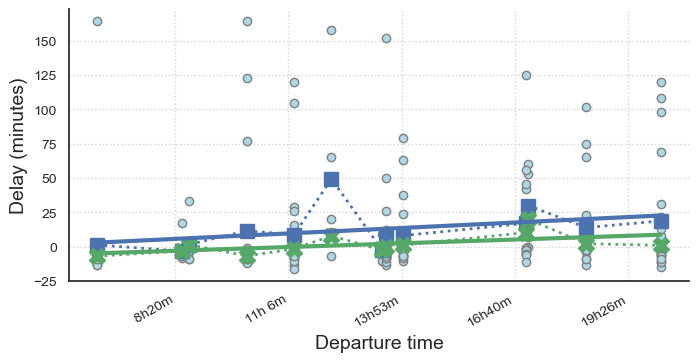

In [42]:
fig1 = Figure_style(8, 4, 1, 1)
fig1.pos_update(0, 0)
fig1.cust_scatter(df2['hours_depart'], df2['DEPARTURE_DELAY'], markeredge = True)
fig1.cust_plot(X1, Y1, color = 'b', linestyle = ':', linewidth = 2, marker = ('b','s', 10))
fig1.cust_plot(X2, Y2, color = 'g', linestyle = ':', linewidth = 2, marker = ('g','X', 12))
fig1.cust_plot(X1, result2, color = 'b', linewidth = 3)
fig1.cust_plot(X2, result3, color = 'g', linewidth = 3)
fig1.style()
fig1.set_ylabel('Delay (minutes)', fontsize = 14)
fig1.set_xlabel('Departure time', fontsize = 14)
#____________________________________
# convert and set the x ticks labels
fct_convert = lambda x: (int(x/3600) , int(divmod(x,3600)[1]/60))
fig1.axs[fig1.ix, fig1.iy].set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*fct_convert(x))
                                            for x in fig1.axs[fig1.ix, fig1.iy].get_xticks()]);

- Tr∆∞·ªõc h·∫øt, trong h√¨nh n√†y, c√°c ƒëi·ªÉm t∆∞∆°ng ·ª©ng v·ªõi c√°c chuy·∫øn bay ri√™ng l·∫ª ƒë∆∞·ª£c th·ªÉ hi·ªán b·∫±ng c√°c ƒëi·ªÉm m√†u x√°m. Gi√° tr·ªã trung b√¨nh c·ªßa c√°c ƒëi·ªÉm n√†y cho ƒë·ªô tr·ªÖ trung b√¨nh v√† gi√° tr·ªã trung b√¨nh c·ªßa t·∫≠p h·ª£p c√°c ƒëi·ªÉm ban ƒë·∫ßu t∆∞∆°ng ·ª©ng v·ªõi c√°c √¥ vu√¥ng m√†u xanh lam. B·∫±ng c√°ch lo·∫°i b·ªè ƒë·ªô tr·ªÖ c·ª±c ƒë·ªô (> 1h), ng∆∞·ªùi ta s·∫Ω c√≥ ƒë∆∞·ª£c ƒë·ªô tr·ªÖ trung b√¨nh ƒë∆∞·ª£c bi·ªÉu th·ªã b·∫±ng c√°c d·∫•u g·∫°ch ch√©o m√†u xanh l√° c√¢y. Do ƒë√≥, trong tr∆∞·ªùng h·ª£p ƒë·∫ßu ti√™n, s·ª± ph√π h·ª£p (ƒë∆∞·ªùng cong m√†u xanh ƒë·∫∑c) d·∫´n ƒë·∫øn m·ªôt d·ª± ƒëo√°n t∆∞∆°ng ·ª©ng v·ªõi ƒë·ªô tr·ªÖ trung b√¨nh l√† ‚àº
‚àº
   L·ªõn h∆°n 10 ph√∫t so v·ªõi d·ª± ƒëo√°n thu ƒë∆∞·ª£c trong tr∆∞·ªùng h·ª£p th·ª© hai (ƒë∆∞·ªùng cong m√†u xanh l√° c√¢y) v√† ƒëi·ªÅu n√†y, v√†o b·∫•t k·ª≥ gi·ªù n√†o trong ng√†y.
K·∫øt lu·∫≠n, ch√∫ng ta th·∫•y trong v√≠ d·ª• n√†y r·∫±ng c√°ch ch√∫ng ta qu·∫£n l√Ω ƒë·ªô tr·ªÖ c·ª±c ƒë·ªô s·∫Ω c√≥ t√°c ƒë·ªông quan tr·ªçng ƒë·∫øn vi·ªác l·∫≠p m√¥ h√¨nh. Tuy nhi√™n, l∆∞u √Ω r·∫±ng v√≠ d·ª• hi·ªán t·∫°i t∆∞∆°ng ·ª©ng v·ªõi m·ªôt tr∆∞·ªùng h·ª£p ƒë√£ ch·ªçn trong ƒë√≥ t√°c ƒë·ªông c·ªßa s·ª± ch·∫≠m tr·ªÖ c·ª±c ƒë·ªô ƒë∆∞·ª£c tƒÉng l√™n b·ªüi s·ªë l∆∞·ª£ng chuy·∫øn bay h·∫°n ch·∫ø. C√≥ l·∫Ω, t√°c ƒë·ªông c·ªßa s·ª± ch·∫≠m tr·ªÖ nh∆∞ v·∫≠y s·∫Ω √≠t r√µ r·ªát h∆°n trong ph·∫ßn l·ªõn c√°c tr∆∞·ªùng h·ª£p.

___
#### 5.1.2 Polynomial degree: splitting the dataset


- Tr√™n th·ª±c t·∫ø, thay v√¨ th·ª±c hi·ªán m·ªôt h·ªìi quy tuy·∫øn t√≠nh ƒë∆°n gi·∫£n, ch√∫ng ta c√≥ th·ªÉ c·∫£i thi·ªán m√¥ h√¨nh ƒë·ªÉ ph√π h·ª£p v·ªõi ƒëa th·ª©c b·∫≠c ùëÅ
 . L√†m nh∆∞ v·∫≠y, c·∫ßn ph·∫£i x√°c ƒë·ªãnh m·ª©c ƒë·ªô
  t·ªëi ∆∞u ƒë·ªÉ bi·ªÉu di·ªÖn d·ªØ li·ªáu. Khi tƒÉng b·∫≠c ƒëa th·ª©c, ƒëi·ªÅu quan tr·ªçng l√† **ph·∫£i ngƒÉn ch·∫∑n overfiting** v√† ch√∫ng ta th·ª±c hi·ªán vi·ªác n√†y b·∫±ng c√°ch t√°ch t·∫≠p d·ªØ li·ªáu trong c√°c t·∫≠p th·ª≠ nghi·ªám v√† hu·∫•n luy·ªán. M·ªôt v·∫•n ƒë·ªÅ c√≥ th·ªÉ n·∫£y sinh v·ªõi quy tr√¨nh n√†y l√† m√¥ h√¨nh k·∫øt th√∫c b·∫±ng c√°ch * gi√°n ti·∫øp h·ªçc n·ªôi dung c·ªßa t·∫≠p ki·ªÉm tra v√† do ƒë√≥ b·ªã sai l·ªách. ƒê·ªÉ tr√°nh ƒëi·ªÅu n√†y, d·ªØ li·ªáu c√≥ th·ªÉ ƒë∆∞·ª£c t√°ch l·∫°i th√†nh 3 b·ªô: train, test v√† validation. M·ªôt ph∆∞∆°ng ph√°p thay th·∫ø cho k·ªπ thu·∫≠t n√†y, th∆∞·ªùng m·∫°nh h∆°n, l√† ph∆∞∆°ng ph√°p cross-validation. Ph∆∞∆°ng ph√°p n√†y bao g·ªìm vi·ªác th·ª±c hi·ªán t√°ch d·ªØ li·ªáu ƒë·∫ßu ti√™n trong c√°c t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p test. Nh∆∞ m·ªçi khi, vi·ªác h·ªçc ƒë∆∞·ª£c th·ª±c hi·ªán tr√™n b·ªô ƒë√†o t·∫°o, nh∆∞ng ƒë·ªÉ tr√°nh h·ªçc qu√° nhi·ªÅu, n√≥ ƒë∆∞·ª£c chia th√†nh nhi·ªÅu ph·∫ßn ƒë·ªÉ s·ª≠ d·ª•ng xen k·∫Ω cho vi·ªác ƒë√†o t·∫°o v√† ki·ªÉm tra.
L∆∞u √Ω r·∫±ng n·∫øu t·∫≠p d·ªØ li·ªáu nh·ªè, s·ª± t√°ch bi·ªát trong c√°c t·∫≠p ki·ªÉm tra v√† hu·∫•n luy·ªán c√≥ th·ªÉ d·∫´n ƒë·∫øn sai l·ªách trong ∆∞·ªõc l∆∞·ª£ng c√°c tham s·ªë. Trong th·ª±c t·∫ø, ph∆∞∆°ng ph√°p x√°c nh·∫≠n ch√©o tr√°nh ƒë∆∞·ª£c s·ª± sai l·ªách nh∆∞ v·∫≠y. Tr√™n th·ª±c t·∫ø, trong m√¥ h√¨nh hi·ªán t·∫°i, ch√∫ng ta s·∫Ω g·∫∑p lo·∫°i v·∫•n ƒë·ªÅ n√†y v√† trong ph·∫ßn ti·∫øp theo, ta s·∫Ω n√™u r√µ ƒëi·ªÅu n√†y. V√≠ d·ª•, ch√∫ng ta c√≥ th·ªÉ xem x√©t m·ªôt tr∆∞·ªùng h·ª£p c·ª±c ƒëoan, sau khi t√°ch, t·∫≠p hu·∫•n luy·ªán s·∫Ω ch·ªâ ch·ª©a gi·ªù <<20h v√† t·∫≠p ki·ªÉm tra s·∫Ω c√≥ gi·ªù>>
  8 gi·ªù t·ªëi Sau ƒë√≥, m√¥ h√¨nh s·∫Ω kh√¥ng th·ªÉ t√°i t·∫°o ch√≠nh x√°c d·ªØ li·ªáu n√†y, d·ªØ li·ªáu m√† n√≥ s·∫Ω kh√¥ng th·∫•y t∆∞∆°ng ƒë∆∞∆°ng trong qu√° tr√¨nh ƒë√†o t·∫°o. Ph∆∞∆°ng ph√°p x√°c nh·∫≠n ch√©o tr√°nh ƒë∆∞·ª£c s·ª± sai l·ªách n√†y v√¨ t·∫•t c·∫£ d·ªØ li·ªáu ƒë∆∞·ª£c s·ª≠ d·ª•ng li√™n ti·∫øp ƒë·ªÉ ƒëi·ªÅu khi·ªÉn m√¥ h√¨nh.
  
**a) ƒê·ªô ch·ªách ƒë∆∞·ª£c gi·ªõi thi·ªáu b·ªüi vi·ªác t√°ch t·∫≠p d·ªØ li·ªáu**
ƒê·ªÉ ki·ªÉm tra t√°c ƒë·ªông c·ªßa vi·ªác ph√¢n t√°ch d·ªØ li·ªáu ƒë·ªëi v·ªõi vi·ªác x√°c ƒë·ªãnh m√¥ h√¨nh, tr∆∞·ªõc ti√™n t√¥i x√°c ƒë·ªãnh l·ªõp * fit_polynome *:

In [43]:
class fit_polynome:

    def __init__(self, data):
        self.data = data[['mean', 'hours_depart_min']].dropna(how='any', axis = 0)

    def split(self, method):        
        self.method = method        
        self.X = np.array(self.data['hours_depart_min'])
        self.Y = np.array(self.data['mean'])
        self.X = self.X.reshape(len(self.X),1)
        self.Y = self.Y.reshape(len(self.Y),1)

        if method == 'all':
            self.X_train = self.X
            self.Y_train = self.Y
            self.X_test  = self.X
            self.Y_test  = self.Y                        
        elif method == 'split':            
            self.X_train, self.X_test, self.Y_train, self.Y_test = \
                train_test_split(self.X, self.Y, test_size=0.3)
    
    def train(self, pol_order):
        self.poly = PolynomialFeatures(degree = pol_order)
        self.regr = linear_model.LinearRegression()
        self.X_ = self.poly.fit_transform(self.X_train)
        self.regr.fit(self.X_, self.Y_train)
    
    def predict(self, X):
        self.X_ = self.poly.fit_transform(X)
        self.result = self.regr.predict(self.X_)
    
    def calc_score(self):        
        X_ = self.poly.fit_transform(self.X_test)
        result = self.regr.predict(X_)
        self.score = metrics.mean_squared_error(result, self.Y_test)

- L·ªõp * fit_polynome * cho ph√©p b·∫°n th·ª±c hi·ªán t·∫•t c·∫£ c√°c thao t√°c li√™n quan ƒë·∫øn vi·ªác fit  v√† save qu·∫£. Khi g·ªçi ph∆∞∆°ng th·ª©c split (), bi·∫øn 'method' x√°c ƒë·ªãnh c√°ch d·ªØ li·ªáu ban ƒë·∫ßu ƒë∆∞·ª£c ph√¢n t√°ch:
- * method = 'all' *: t·∫•t c·∫£ d·ªØ li·ªáu ƒë·∫ßu v√†o ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ hu·∫•n luy·ªán v√† sau ƒë√≥ ki·ªÉm tra m√¥ h√¨nh
- * method = 'split' *: ch√∫ng ta s·ª≠ d·ª•ng ph∆∞∆°ng th·ª©c * train_test_split () * c·ªßa sklearn ƒë·ªÉ x√°c ƒë·ªãnh c√°c b·ªô ki·ªÉm tra & ƒë√†o t·∫°o
Sau ƒë√≥, c√°c ph∆∞∆°ng th·ª©c kh√°c c·ªßa l·ªõp c√≥ c√°c ch·ª©c nƒÉng sau:
- ** train (n) **: ƒëi·ªÅu khi·ªÉn d·ªØ li·ªáu tr√™n t·∫≠p hu·∫•n luy·ªán v√† t·∫°o ra m·ªôt ƒëa th·ª©c b·∫≠c n
- ** d·ª± ƒëo√°n (X) **: t√≠nh to√°n c√°c ƒëi·ªÉm Y ƒë∆∞·ª£c li√™n k·∫øt v·ªõi ƒë·∫ßu v√†o X v√† cho m√¥ h√¨nh ƒë∆∞·ª£c ƒëi·ªÅu khi·ªÉn tr∆∞·ªõc ƒë√≥
- ** calc_score () **: t√≠nh to√°n ƒëi·ªÉm c·ªßa m√¥ h√¨nh li√™n quan ƒë·∫øn d·ªØ li·ªáu b·ªô ki·ªÉm tra
ƒê·ªÉ minh h·ªça s·ª± sai l·ªách do vi·ªác l·ª±a ch·ªçn t·∫≠p h·ª£p th·ª≠ nghi·ªám ƒë∆∞a ra, ta ti·∫øn h√†nh theo c√°ch sau: th·ª±c hi·ªán m·ªôt s·ªë ph√¢n t√°ch "train / test" c·ªßa t·∫≠p d·ªØ li·ªáu v√† ƒë·ªëi v·ªõi m·ªói tr∆∞·ªùng h·ª£p, ta ph√π h·ª£p v·ªõi c√°c ƒëa th·ª©c c√≥ th·ª© t·ª± ** n = 1, 2 v√† 3 *, b·∫±ng c√°ch t√≠nh ƒëi·ªÉm s·ªë t∆∞∆°ng ·ª©ng c·ªßa ch√∫ng. Sau ƒë√≥,cho th·∫•y r·∫±ng theo s·ª± l·ª±a ch·ªçn c·ªßa ph√©p t√°ch, ƒëi·ªÉm t·ªët nh·∫•t c√≥ th·ªÉ nh·∫≠n ƒë∆∞·ª£c v·ªõi b·∫•t k·ª≥ gi√° tr·ªã n√†o c·ªßa *n**. Trong th·ª±c t·∫ø, ch·ªâ c·∫ßn th·ª±c hi·ªán h√†ng ch·ª•c m√¥ h√¨nh ƒë·ªÉ c√≥ ƒë∆∞·ª£c k·∫øt qu·∫£ n√†y l√† ƒë·ªß. H∆°n n·ªØa, s·ª± sai l·ªách n√†y ƒë∆∞·ª£c ƒë∆∞a ra b·ªüi s·ª± l·ª±a ch·ªçn c·ªßa "train / test" t√°ch bi·ªát v√† k·∫øt qu·∫£ t·ª´ k√≠ch th∆∞·ªõc nh·ªè c·ªßa t·∫≠p d·ªØ li·ªáu ƒë∆∞·ª£c m√¥ h√¨nh h√≥a. Tr√™n th·ª±c t·∫ø, t√¥i l·∫•y v√≠ d·ª• nh∆∞ tr∆∞·ªùng h·ª£p c·ªßa h√£ng h√†ng kh√¥ng *American Airlines* (h√£ng h√†ng kh√¥ng l·ªõn th·ª© hai) v√† s√¢n bay c√≥ m√£ s·ªë 1129804, l√† s√¢n bay c√≥ nhi·ªÅu chuy·∫øn bay ƒëƒÉng k√Ω nh·∫•t cho h√£ng ƒë√≥. ƒê√¢y l√† m·ªôt trong nh·ªØng k·ªãch b·∫£n √≠t thu·∫≠n l·ª£i nh·∫•t cho s·ª± xu·∫•t hi·ªán c·ªßa lo·∫°i th√†nh ki·∫øn ‚Äã‚Äãn√†y, tuy nhi√™n, v·∫´n c√≥:

mod√®le n¬∫1 , min. pour n = 1, score = 149.8
mod√®le n¬∫2 , min. pour n = 2, score = 66.3
mod√®le n¬∫3 , min. pour n = 1, score = 14.5
mod√®le n¬∫4 , min. pour n = 2, score = 68.9
mod√®le n¬∫5 , min. pour n = 3, score = 7.0


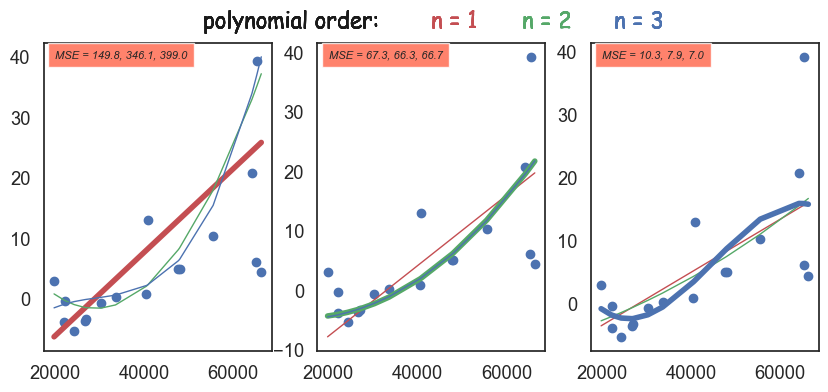

In [44]:
fig = plt.figure(1, figsize=(10,4))

ax = ['_' for _ in range(4)]
ax[1]=fig.add_subplot(131) 
ax[2]=fig.add_subplot(132) 
ax[3]=fig.add_subplot(133) 

id_airport = 'BNA'
test2 = get_flight_delays(df, carrier, id_airport, True)

result = ['_' for _ in range(4)]
score = [10000 for _ in range(4)]
found = [False for _ in range(4)]
fit = fit_polynome(test2)

color = '.rgbyc'

inc = 0
while True:
    inc += 1
    fit.split('split')
    for i in range(1,4):
        fit.train(pol_order = i)
        fit.predict(fit.X)
        result[i] = fit.result
        fit.calc_score()
        score[i]  = fit.score

    [ind_min] = [j for j,val in enumerate(score) if min(score) == val]
    print("mod√®le n¬∫{:<2}, min. pour n = {}, score = {:.1f}".format(inc, ind_min,score[ind_min]))
    
    if not found[ind_min]:            
        for i in range(1,4):
            ax[ind_min].plot(fit.X, result[i], color[i], linewidth = 4 if i == ind_min else 1)
        ax[ind_min].scatter(fit.X, fit.Y)                
        ax[ind_min].text(0.05, 0.95, 'MSE = {:.1f}, {:.1f}, {:.1f}'.format(*score[1:4]),
                         style='italic', transform=ax[ind_min].transAxes, fontsize = 8,
                         bbox={'facecolor':'tomato', 'alpha':0.8, 'pad':5})                
        found[ind_min] = True

    shift = 0.5
    plt.text(-1+shift, 1.05, "polynomial order:", color = 'k',
                transform=ax[2].transAxes, fontsize = 16, family='fantasy')
    plt.text(0+shift, 1.05, "n = 1", color = 'r', 
                transform=ax[2].transAxes, fontsize = 16, family='fantasy')
    plt.text(0.4+shift, 1.05, "n = 2", color = 'g', 
                transform=ax[2].transAxes, fontsize = 16, family='fantasy')
    plt.text(0.8+shift, 1.05, "n = 3", color = 'b',
                transform=ax[2].transAxes, fontsize = 16, family='fantasy')
   
    if inc == 40 or all(found[1:4]): break

- Trong h√¨nh n√†y, c√°c b·∫£ng t·ª´ tr√°i sang ph·∫£i t∆∞∆°ng ·ª©ng v·ªõi 3 ph·∫ßn ph√¢n t√°ch d·ªØ li·ªáu trong t·∫≠p hu·∫•n luy·ªán v√† th·ª≠ nghi·ªám, trong ƒë√≥ c√°c m√¥ h√¨nh t·ªët nh·∫•t thu ƒë∆∞·ª£c t∆∞∆°ng ·ª©ng v·ªõi c√°c ƒëa th·ª©c b·∫≠c 1, 2 v√† 3. Tr√™n m·ªói b·∫£ng n√†y, 3 ph√π h·ª£p v·ªõi c√°c ƒëa th·ª©c ƒë√£ ƒë∆∞·ª£c ƒë·∫°i di·ªán v√† m√¥ h√¨nh t·ªët nh·∫•t t∆∞∆°ng ·ª©ng v·ªõi ƒë∆∞·ªùng cong d√†y

**b) L·ª±a ch·ªçn b·∫±ng c√°ch x√°c nh·∫≠n ch√©o**
M·ªôt trong nh·ªØng ∆∞u ƒëi·ªÉm c·ªßa ph∆∞∆°ng ph√°p x√°c nh·∫≠n ch√©o l√† n√≥ tr√°nh ƒë∆∞·ª£c s·ª± sai l·ªách v·ª´a ƒë·∫∑t ra khi ch·ªçn b·∫≠c c·ªßa ƒëa th·ª©c. ƒê·ªÉ s·ª≠ d·ª•ng ph∆∞∆°ng ph√°p n√†y, t√¥i x√°c ƒë·ªãnh m·ªôt l·ªõp m·ªõi m√† t√¥i s·∫Ω s·ª≠ d·ª•ng sau n√†y ƒë·ªÉ th·ª±c hi·ªán c√°c kh·ªõp:

In [ ]:
class fit_polynome_cv:

    def __init__(self, data):
        self.data = data[['mean', 'hours_depart_min']].dropna(how='any', axis = 0)
        self.X = np.array(self.data['hours_depart_min'])
        self.Y = np.array(self.data['mean'])
        self.X = self.X.reshape(len(self.X),1)
        self.Y = self.Y.reshape(len(self.Y),1)

    def train(self, pol_order, nb_folds):
        self.poly = PolynomialFeatures(degree = pol_order)
        self.regr = linear_model.LinearRegression()
        self.X_ = self.poly.fit_transform(self.X)
        self.result = cross_val_predict(self.regr, self.X_, self.Y, cv = nb_folds)
    
    def calc_score(self, pol_order, nb_folds):
        self.poly = PolynomialFeatures(degree = pol_order)
        self.regr = linear_model.LinearRegression()
        self.X_ = self.poly.fit_transform(self.X)
        self.score = np.mean(cross_val_score(self.regr, self.X_, self.Y,
                                             cv = nb_folds, scoring = 'mean_squared_error'))


- L·ªõp n√†y c√≥ hai ph∆∞∆°ng th·ª©c:
** train (n, nb_folds) **: c√°c t·∫≠p hu·∫•n luy·ªán 'nb_folds' ƒë∆∞·ª£c x√°c ƒë·ªãnh t·ª´ t·∫≠p d·ªØ li·ªáu ban ƒë·∫ßu v√† ƒëi·ªÅu khi·ªÉn m·ªôt ƒëa th·ª©c b·∫≠c 'n' tr√™n m·ªói t·∫≠p n√†y. Ph∆∞∆°ng ph√°p n√†y tr·∫£ v·ªÅ k·∫øt qu·∫£ l√† c√°c d·ª± ƒëo√°n Y thu ƒë∆∞·ª£c cho c√°c b·ªô th·ª≠ nghi·ªám kh√°c nhau.
** calc_score (n, nb_folds) *: th·ª±c hi·ªán quy tr√¨nh t∆∞∆°ng t·ª± nh∆∞ ph∆∞∆°ng th·ª©c * train ** ngo·∫°i tr·ª´ ph∆∞∆°ng th·ª©c n√†y t√≠nh ƒëi·ªÉm ph√π h·ª£p ch·ª© kh√¥ng ph·∫£i c√°c gi√° tr·ªã d·ª± ƒëo√°n tr√™n c√°c d·ªØ li·ªáu th·ª≠ nghi·ªám kh√°c nhau.
Theo m·∫∑c ƒë·ªãnh, ph∆∞∆°ng th·ª©c 'K-fold' ƒë∆∞·ª£c s·ª≠ d·ª•ng b·ªüi c√°c ph∆∞∆°ng th·ª©c sklearn * cross_val_posystem () * v√† * cross_val_score () *. C√°c ph∆∞∆°ng ph√°p n√†y c√≥ t√≠nh x√°c ƒë·ªãnh trong vi·ªác l·ª±a ch·ªçn K n·∫øp g·∫•p, ƒëi·ªÅu n√†y ng·ª• √Ω r·∫±ng ƒë·ªëi v·ªõi m·ªôt gi√° tr·ªã K c·ªë ƒë·ªãnh, k·∫øt qu·∫£ thu ƒë∆∞·ª£c khi s·ª≠ d·ª•ng c√°c ph∆∞∆°ng ph√°p n√†y s·∫Ω lu√¥n gi·ªëng nhau. Nh∆∞ ƒë√£ th·∫•y trong v√≠ d·ª• tr∆∞·ªõc, ƒë√¢y kh√¥ng ph·∫£i l√† tr∆∞·ªùng h·ª£p khi s·ª≠ d·ª•ng ph∆∞∆°ng th·ª©c train_test_split (). Do ƒë√≥, n·∫øu ch√∫ng ta l·∫•y c√πng m·ªôt t·∫≠p d·ªØ li·ªáu nh∆∞ trong v√≠ d·ª• tr∆∞·ªõc, ph∆∞∆°ng ph√°p x√°c nh·∫≠n ch√©o s·∫Ω gi√∫p ch√∫ng ta c√≥ th·ªÉ ch·ªçn m·ª©c ƒë·ªô ƒëa th·ª©c t·ªët nh·∫•t:

In [ ]:
#id_airport = 1129804 
nb_folds = 10
print('Max possible number of folds: {} \n'.format(test2.shape[0]-1))
fit2 = fit_polynome_cv(test2)
for i in range(1, 8):
    fit2.calc_score(i, nb_folds)
    print('n={} -> MSE = {}'.format(i, round(abs(fit2.score),3)))



Ch√∫ng ta c√≥ th·ªÉ th·∫•y r·∫±ng s·ª≠ d·ª•ng ph∆∞∆°ng ph√°p n√†y cho ch√∫ng ta r·∫±ng m√¥ h√¨nh t·ªët nh·∫•t (t·ª©c l√† m√¥ h√¨nh t·ªïng qu√°t t·ªët nh·∫•t) thu ƒë∆∞·ª£c v·ªõi m·ªôt ƒëa th·ª©c b·∫≠c 2. ·ªû giai ƒëo·∫°n n√†y c·ªßa th·ªß t·ª•c, vi·ªác l·ª±a ch·ªçn ƒëa th·ª©c b·∫≠c a ƒë√£ ƒë∆∞·ª£c x√°c nh·∫≠n v√† b√¢y gi·ªù ch√∫ng ta c√≥ th·ªÉ s·ª≠ d·ª•ng t·∫•t c·∫£ d·ªØ li·ªáu ƒë·ªÉ th·ª±c hi·ªán ph√π h·ª£p:

In [ ]:
fit = fit_polynome(test2)
fit.split('all')
fit.train(pol_order = 2)
fit.predict(fit.X)


- Do ƒë√≥, trong h√¨nh d∆∞·ªõi ƒë√¢y, ph·∫ßn gh√©p c·ªßa ƒëa th·ª©c K = 50 t∆∞∆°ng ·ª©ng v·ªõi ph√©p t√≠nh x√°c nh·∫≠n ch√©o d·∫´n ƒë·∫øn ƒë∆∞·ªùng cong m√†u ƒë·ªè. S·ª± ph√π h·ª£p ƒëa th·ª©c t∆∞∆°ng ·ª©ng v·ªõi m√¥ h√¨nh cu·ªëi c√πng t∆∞∆°ng ·ª©ng v·ªõi ƒë∆∞·ªùng cong m√†u xanh lam.

In [ ]:
fit2.train(pol_order = 2, nb_folds = nb_folds)

In [ ]:
fig1 = Figure_style(8, 4, 1, 1) ; fig1.pos_update(0, 0)
fig1.cust_scatter(fit2.X, fit2.Y, markeredge = True, label = 'initial data points')
fig1.cust_plot(fit.X,fit2.result,color=u'#1f77b4',linestyle='--',linewidth=2,label='CV output')
fig1.cust_plot(fit.X,fit.result,color=u'#ff7f0e',linewidth = 3,label='final fit')
fig1.style(); fig1.draw_legend('upper left')
fig1.set_ylabel('Delay (minutes)') ; fig1.set_xlabel('Departure time')
#____________________________________
# convert and set the x ticks labels
fct_convert = lambda x: (int(x/3600) , int(divmod(x,3600)[1]/60))
fig1.axs[fig1.ix, fig1.iy].set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*fct_convert(x))
                                            for x in fig1.axs[fig1.ix, fig1.iy].get_xticks()]);

In [ ]:
score = metrics.mean_squared_error(fit.result, fit2.Y)
score

#### 5.1.3 Model test: prediction of end-January delays

·ªû giai ƒëo·∫°n n√†y, m√¥ h√¨nh ƒë∆∞·ª£c ƒëi·ªÅu khi·ªÉn ƒë∆∞·ª£c th·ª≠ nghi·ªám tr√™n t·∫≠p hu·∫•n luy·ªán bao g·ªìm d·ªØ li·ªáu c·ªßa 3 tu·∫ßn ƒë·∫ßu ti√™n c·ªßa th√°ng Gi√™ng. B√¢y gi·ªù ch√∫ng ta xem x√©t so s√°nh c√°c d·ª± ƒëo√°n v√† quan s√°t cho tu·∫ßn th·ª© 4 c·ªßa th√°ng 1:

In [ ]:
test_data = get_flight_delays(df_test, carrier, id_airport, True)
test_data = test_data[['mean', 'hours_depart_min']].dropna(how='any', axis = 0)
X_test = np.array(test_data['hours_depart_min'])
Y_test = np.array(test_data['mean'])
X_test = X_test.reshape(len(X_test),1)
Y_test = Y_test.reshape(len(Y_test),1)
fit.predict(X_test)

and the MSE score of the model is:

In [ ]:
score = metrics.mean_squared_error(fit.result, Y_test)
score


ƒê·ªÉ bi·∫øt ƒë∆∞·ª£c √Ω nghƒ©a c·ªßa m·ªôt gi√° tr·ªã nh∆∞ v·∫≠y ƒë·ªëi v·ªõi MSE, ch√∫ng ta c√≥ th·ªÉ gi·∫£ ƒë·ªãnh m·ªôt l·ªói kh√¥ng ƒë·ªïi tr√™n m·ªói ƒëi·ªÉm c·ªßa t·∫≠p d·ªØ li·ªáu. Trong tr∆∞·ªùng h·ª£p ƒë√≥, t·∫°i m·ªói th·ªùi ƒëi·ªÉm
i
  , ch√∫ng ta c√≥:
  
\begin{eqnarray}
y_i - f(x_i) = cste = \sqrt{MSE}
\end{eqnarray}




- do ƒë√≥ t·∫°o ra s·ª± kh√°c bi·ªát v·ªÅ s·ªë ph√∫t gi·ªØa ƒë·ªô tr·ªÖ d·ª± ƒëo√°n v√† ƒë·ªô tr·ªÖ th·ª±c t·∫ø. Trong tr∆∞·ªùng h·ª£p n√†y, s·ª± kh√°c bi·ªát gi·ªØa m√¥ h√¨nh v√† c√°c quan s√°t th∆∞·ªùng l√†:

In [ ]:
'Ecart = {:.2f} min'.format(np.sqrt(score))

___
### 5.2 Model n¬∫2: One airline, all airports

Trong ph·∫ßn tr∆∞·ªõc, m√¥ h√¨nh ch·ªâ xem x√©t m·ªôt s√¢n bay. Quy tr√¨nh n√†y c√≥ kh·∫£ nƒÉng kh√¥ng hi·ªáu qu·∫£ v√¨ c√≥ kh·∫£ nƒÉng m·ªôt s·ªë quan s√°t c√≥ th·ªÉ ƒë∆∞·ª£c ngo·∫°i suy t·ª´ m·ªôt c·ªïng t·ªõi c·ªïng kh√°c. Do ƒë√≥, c√≥ th·ªÉ c√≥ l·ª£i khi th·ª±c hi·ªán m·ªôt s·ª± ph√π h·ª£p duy nh·∫•t, ƒëi·ªÅu n√†y s·∫Ω t√≠nh ƒë·∫øn t·∫•t c·∫£ c√°c s√¢n bay. ƒê·∫∑c bi·ªát, ƒëi·ªÅu n√†y s·∫Ω cho ph√©p d·ª± ƒëo√°n s·ª± ch·∫≠m tr·ªÖ c·ªßa c√°c s√¢n bay c√≥ s·ªë l∆∞·ª£ng d·ªØ li·ªáu th·∫•p v·ªõi ƒë·ªô ch√≠nh x√°c cao h∆°n.

In [ ]:
def get_merged_delays(df, carrier):
    liste_airports = df[df['AIRLINE'] == carrier]['ORIGIN_AIRPORT'].unique()
    i = 0
    liste_columns = ['AIRPORT_ID', 'hours_depart_min', 'mean']
    for id_airport in liste_airports:
        test2 = get_flight_delays(df, carrier, id_airport, True)
        test2.loc[:, 'AIRPORT_ID'] = id_airport
        test2 = test2[liste_columns]
        test2.dropna(how = 'any', inplace = True)
        if i == 0:
            merged_df = test2.copy()
        else:
            merged_df = pd.concat([merged_df, test2], ignore_index = True)
        i += 1    
    return merged_df

In [ ]:
carrier = 'AA'
merged_df = get_merged_delays(df, carrier)
merged_df.shape


Trong khung d·ªØ li·ªáu *merge_df*, c√°c s√¢n bay ƒë∆∞·ª£c tham chi·∫øu b·ªüi m·ªôt s·ªë nh·∫≠n d·∫°ng ƒë∆∞·ª£c cung c·∫•p trong bi·∫øn **ORIGIN_AIRPORT**.
C√°c nh√£n t∆∞∆°ng ·ª©ng kh√¥ng th·ªÉ ƒë∆∞·ª£c s·ª≠ d·ª•ng tr·ª±c ti·∫øp cho ph√π h·ª£p v√† do ƒë√≥ ta s·ª≠ d·ª•ng ph∆∞∆°ng ph√°p *one-hot-encoding*:

In [ ]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(merged_df['AIRPORT_ID'])
#__________________________________________________________
# correspondance between the codes and tags of the airports
zipped = zip(integer_encoded, merged_df['AIRPORT_ID'])
label_airports = list(set(list(zipped)))
label_airports.sort(key = lambda x:x[0])
label_airports[:5]


·ªû tr√™n,ta ƒë√£ ch·ªâ ƒë·ªãnh m·ªôt nh√£n cho m·ªói s√¢n bay. S·ª± t∆∞∆°ng ·ª©ng gi·ªØa nh√£n v√† s·ªë nh·∫≠n d·∫°ng ban ƒë·∫ßu ƒë√£ ƒë∆∞·ª£c l∆∞u trong danh s√°ch *label_airport*. B√¢y gi·ªù t√¥i ti·∫øp t·ª•c v·ªõi "M·ªôt m√£ h√≥a ph·ªï bi·∫øn" b·∫±ng c√°ch t·∫°o m·ªôt ma tr·∫≠n trong ƒë√≥ thay v√¨ bi·∫øn **ORIGIN_AIRPORT** c√≥ ch·ª©a nh√£n $M$, ch√∫ng ta x√¢y d·ª±ng m·ªôt ma tr·∫≠n v·ªõi c√°c c·ªôt $M$, ch·ª©a 0 v√† 1 t√πy thu·ªôc v√†o s·ª± t∆∞∆°ng ·ª©ng v·ªõi c√°c s√¢n bay c·ª• th·ªÉ:

In [ ]:
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
b = np.array(merged_df['hours_depart_min'])
b = b.reshape(len(b),1)
X = np.hstack((onehot_encoded, b))
Y = np.array(merged_df['mean'])
Y = Y.reshape(len(Y), 1)
print(X.shape, Y.shape)

___
#### 5.2.1 Linear regression

C√°c ma tr·∫≠n X v√† Y do ƒë√≥ ƒë∆∞·ª£c t·∫°o ra c√≥ th·ªÉ ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ th·ª±c hi·ªán m·ªôt h·ªìi quy tuy·∫øn t√≠nh:

In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
predictions = lm.predict(X)
print("MSE =", metrics.mean_squared_error(predictions, Y))

·ªû ƒë√¢y, ta ƒë√£ t√≠nh ƒëi·ªÉm MSE c·ªßa s·ª± ph√π h·ª£p. Tr√™n th·ª±c t·∫ø, ch√∫ng ta c√≥ th·ªÉ c√≥ c·∫£m gi√°c v·ªÅ ch·∫•t l∆∞·ª£ng c·ªßa s·ª± ph√π h·ª£p b·∫±ng c√°ch xem x√©t s·ªë l∆∞·ª£ng d·ª± ƒëo√°n trong ƒë√≥ ch√™nh l·ªách v·ªõi gi√° tr·ªã th·ª±c l·ªõn h∆°n 15 ph√∫t:

In [ ]:
icount = 0
for i, val in enumerate(Y):
    if abs(val-predictions[i]) > 15: icount += 1
'{:.2f}%'.format(icount / len(predictions) * 100)

Trong th·ª±c t·∫ø, m√¥ h√¨nh n√†y c√≥ xu h∆∞·ªõng ƒë√°nh gi√° th·∫•p c√°c ƒë·ªô tr·ªÖ l·ªõn, c√≥ th·ªÉ th·∫•y trong h√¨nh sau:

In [ ]:
tips = pd.DataFrame()
tips["prediction"] = pd.Series([float(s) for s in predictions]) 
tips["original_data"] = pd.Series([float(s) for s in Y]) 
sns.jointplot(x="original_data", y="prediction", data=tips, size = 6, ratio = 7,
              joint_kws={'line_kws':{'color':'limegreen'}}, kind='reg')
plt.xlabel('Mean delays (min)', fontsize = 15)
plt.ylabel('Predictions (min)', fontsize = 15)
plt.plot(list(range(-10,25)), list(range(-10,25)), linestyle = ':', color = 'r')
sns.plt.show()

___
#### 5.2.2 Polynomial regression

B√¢y gi·ªù ta s·∫Ω m·ªü r·ªông fit tr∆∞·ªõc ƒë√≥ b·∫±ng c√°ch s·ª≠ d·ª•ng m·ªôt ƒëa th·ª©c thay v√¨ m·ªôt h√†m tuy·∫øn t√≠nh:

In [ ]:
poly = PolynomialFeatures(degree = 2)
regr = linear_model.LinearRegression()
X_ = poly.fit_transform(X)
regr.fit(X_, Y)

In [ ]:
result = regr.predict(X_)
print("MSE =", metrics.mean_squared_error(result, Y))

Ch√∫ng ta c√≥ th·ªÉ th·∫•y r·∫±ng s·ª± ph√π h·ª£p ƒëa th·ª©c c·∫£i thi·ªán m·ªôt ch√∫t ƒëi·ªÉm MSE. Tr√™n th·ª±c t·∫ø, t·ª∑ l·ªá ph·∫ßn trƒÉm gi√° tr·ªã trong ƒë√≥ ch√™nh l·ªách gi·ªØa d·ª± ƒëo√°n v√† ƒë·ªô tr·ªÖ th·ª±c l·ªõn h∆°n 15 ph√∫t l√†:

In [ ]:
icount = 0
for i, val in enumerate(Y):
    if abs(val-result[i]) > 15: icount += 1
'{:.2f}%'.format(icount / len(result) * 100)

V√† nh∆∞ tr∆∞·ªõc ƒë√¢y, c√≥ th·ªÉ th·∫•y r·∫±ng m√¥ h√¨nh c√≥ xu h∆∞·ªõng t·ªá h∆°n trong tr∆∞·ªùng h·ª£p c√≥ ƒë·ªô tr·ªÖ l·ªõn:

In [ ]:
tips = pd.DataFrame()
tips["prediction"] = pd.Series([float(s) for s in result]) 
tips["original_data"] = pd.Series([float(s) for s in Y]) 
sns.jointplot(x="original_data", y="prediction", data=tips, size = 6, ratio = 7,
              joint_kws={'line_kws':{'color':'limegreen'}}, kind='reg')
plt.xlabel('Mean delays (min)', fontsize = 15)
plt.ylabel('Predictions (min)', fontsize = 15)
plt.plot(list(range(-10,25)), list(range(-10,25)), linestyle = ':', color = 'r')
sns.plt.show()

___
#### 5.2.3 Setting the free parameters

Tr√™n ƒë√¢y, hai m√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c fit v√† test tr√™n b·ªô hu·∫•n luy·ªán. Trong th·ª±c t·∫ø, nh∆∞ ƒë√£ ƒë·ªÅ c·∫≠p ·ªü tr√™n, khi ti·∫øn h√†nh theo c√°ch ƒë√≥ v√† c√°c tham s·ªë t·ª± do c·ªßa m√¥ h√¨nh s·∫Ω b·ªã sai l·ªách. Do ƒë√≥, m√¥ h√¨nh s·∫Ω kh√¥ng cho ph√©p t·ªïng qu√°t h√≥a t·ªët. V√¨ v·∫≠y, ta s·∫Ω chia nh·ªè d·ªØ li·ªáu ƒë·ªÉ ƒë√†o t·∫°o v√† sau ƒë√≥ ki·ªÉm tra m√¥ h√¨nh. M·ª•c ƒë√≠ch s·∫Ω l√† x√°c ƒë·ªãnh b·∫≠c ƒëa th·ª©c cho ph√©p t·ªïng qu√°t h√≥a t·ªët nh·∫•t c√°c d·ª± ƒëo√°n:

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)


Nh∆∞ tr∆∞·ªõc ƒë√¢y, ta fit v·ªõi m√¥ h√¨nh tr√™n t·∫≠p hu·∫•n luy·ªán:

In [ ]:
X_train.shape

In [ ]:
poly = PolynomialFeatures(degree = 2)
regr = linear_model.LinearRegression()
X_ = poly.fit_transform(X_train)
regr.fit(X_, Y_train)
result = regr.predict(X_)
score = metrics.mean_squared_error(result, Y_train)
print("Mean squared error = ", score)

B√¢y gi·ªù, b·∫±ng c√°ch th·ª≠ nghi·ªám tr√™n b·ªô th·ª≠ nghi·ªám, ch√∫ng ta nh·∫≠n ƒë∆∞·ª£c:

In [ ]:
X_ = poly.fit_transform(X_test)
result = regr.predict(X_)
score = metrics.mean_squared_error(result, Y_test)
print("Mean squared error = ", score)

·ªû ƒë√¢y, ch√∫ng ta th·∫•y r·∫±ng **fit ƒë·∫∑c bi·ªát t·ªá v·ªõi MSE> 500 ** (gi√° tr·ªã ch√≠nh x√°c ph·ª• thu·ªôc v√†o qu√° tr√¨nh ch·∫°y v√† ph√¢n chia t·∫≠p d·ªØ li·ªáu), c√≥ nghƒ©a l√† fit ho·∫°t ƒë·ªông k√©m khi ph√¢n chia th√†nh d·ªØ li·ªáu kh√°c. B√¢y gi·ªù ch√∫ng ta h√£y xem x√©t chi ti·∫øt l√Ω do t·∫°i sao ch√∫ng ta c√≥ ƒëi·ªÉm s·ªë t·ªìi t·ªá nh∆∞ v·∫≠y. D∆∞·ªõi ƒë√¢y, ta ki·ªÉm tra t·∫•t c·∫£ c√°c s·ªë h·∫°ng c·ªßa ph√©p t√≠nh MSE v√† x√°c ƒë·ªãnh c√°c s·ªë h·∫°ng l·ªõn nh·∫•t:

In [ ]:
somme = 0
for valeurs in zip(result, Y_test):
    ajout = (float(valeurs[0]) - float(valeurs[1]))**2
    somme += ajout
    if ajout > 10**4:
        print("{:<.1f} {:<.1f} {:<.1f}".format(ajout, float(valeurs[0]), float(valeurs[1])))

Ch√∫ng ta th·∫•y r·∫±ng m·ªôt s·ªë d·ª± ƒëo√°n cho th·∫•y sai s·ªë r·∫•t l·ªõn. Trong th·ª±c t·∫ø, ƒëi·ªÅu n√†y c√≥ th·ªÉ ƒë∆∞·ª£c gi·∫£i th√≠ch l√† do trong qu√° tr√¨nh ph√¢n t√°ch trong t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p ki·ªÉm tra, ** d·ªØ li·ªáu kh√¥ng t∆∞∆°ng ƒë∆∞∆°ng trong t·∫≠p hu·∫•n luy·ªán ƒë√£ ƒë∆∞·ª£c ƒë∆∞a v√†o d·ªØ li·ªáu th·ª≠ nghi·ªám **. Do ƒë√≥, khi t√≠nh to√°n d·ª± ƒëo√°n, m√¥ h√¨nh ph·∫£i ** th·ª±c hi·ªán m·ªôt ph√©p ngo·∫°i suy **. N·∫øu h·ªá s·ªë c·ªßa s·ª± ph√π h·ª£p l·ªõn (th∆∞·ªùng x·∫£y ra khi overfitting), c√°c gi√° tr·ªã ngo·∫°i suy s·∫Ω hi·ªÉn th·ªã c√°c gi√° tr·ªã quan tr·ªçng, nh∆∞ trong tr∆∞·ªùng h·ª£p hi·ªán t·∫°i. ƒê·ªÉ ki·ªÉm so√°t hi·ªán t∆∞·ª£ng n√†y, ch√∫ng ta c√≥ th·ªÉ s·ª≠ d·ª•ng ** ph∆∞∆°ng ph√°p ch√≠nh quy h√≥a ** s·∫Ω ƒë∆∞a ra m·ªôt h√¨nh ph·∫°t cho c√°c m√¥ h√¨nh c√≥ h·ªá s·ªë l√† quan tr·ªçng nh·∫•t:

In [ ]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0.3,normalize=True)
poly = PolynomialFeatures(degree = 2)
X_ = poly.fit_transform(X_train)
ridgereg.fit(X_, Y_train)

B√¢y gi·ªù, n·∫øu ch√∫ng ta t√≠nh ƒëi·ªÉm li√™n quan ƒë·∫øn c√°c d·ª± ƒëo√°n ƒë∆∞·ª£c th·ª±c hi·ªán b·∫±ng k·ªπ thu·∫≠t regularization, ch√∫ng ta c√≥:

In [ ]:
X_ = poly.fit_transform(X_test)
result = ridgereg.predict(X_)
score = metrics.mean_squared_error(result, Y_test)
print("Mean squared error = ", score)

Ch√∫ng ta c√≥ th·ªÉ th·∫•y r·∫±ng ch√∫ng t√¥i ƒë·∫°t ƒë∆∞·ª£c m·ªôt s·ªë ƒëi·ªÉm h·ª£p l√Ω. Do ƒë√≥, v·ªõi quy tr√¨nh hi·ªán t·∫°i, ƒë·ªÉ x√°c ƒë·ªãnh m√¥ h√¨nh t·ªët nh·∫•t, ch√∫ng ta c√≥ hai tham s·ªë tr·ªëng ƒë·ªÉ ƒëi·ªÅu ch·ªânh: b·∫≠c ƒëa th·ª©c v√† h·ªá s·ªë $\alpha$ c·ªßa *'Ridge Regression'*:

In [ ]:
score_min = 10000
for pol_order in range(1, 3):
    for alpha in range(0, 20, 2):
        ridgereg = Ridge(alpha = alpha/10, normalize=True)
        poly = PolynomialFeatures(degree = pol_order)
        regr = linear_model.LinearRegression()
        X_ = poly.fit_transform(X_train)
        ridgereg.fit(X_, Y_train)        
        X_ = poly.fit_transform(X_test)
        result = ridgereg.predict(X_)
        score = metrics.mean_squared_error(result, Y_test)        
        if score < score_min:
            score_min = score
            parameters = [alpha/10, pol_order]
        print("n={}¬†alpha={} , MSE = {:<0.5}".format(pol_order, alpha, score))

Ch√∫ng ta h√£y l∆∞u √Ω r·∫±ng ƒë·ªëi v·ªõi m√¥ h√¨nh n√†y, c√°c ∆∞·ªõc l∆∞·ª£ng thu ƒë∆∞·ª£c v·ªõi h·ªìi quy tuy·∫øn t√≠nh ho·∫∑c ƒëa th·ª©c b·∫≠c 2 l√† kh√° g·∫ßn nhau. B√¢y gi·ªù ta s·ª≠ d·ª•ng c√°c tham s·ªë n√†y ƒë·ªÉ ki·ªÉm tra m·∫´u n√†y tr√™n b·ªô th·ª≠ nghi·ªám:

In [ ]:
ridgereg = Ridge(alpha = parameters[0], normalize=True)
poly = PolynomialFeatures(degree = parameters[1])
X_ = poly.fit_transform(X)
ridgereg.fit(X_, Y)
result = ridgereg.predict(X_)
score = metrics.mean_squared_error(result, Y)        
print(score)

#### 6.2.4 Testing the model: delays of end-january


·ªû giai ƒëo·∫°n n√†y, c√°c d·ª± ƒëo√°n c·ªßa m√¥ h√¨nh ƒë∆∞·ª£c ki·ªÉm tra d·ª±a tr√™n d·ªØ li·ªáu cu·ªëi th√°ng 1. Nh·ªØng d·ªØ li·ªáu n√†y ƒë∆∞·ª£c tr√≠ch xu·∫•t ƒë·∫ßu ti√™n:

In [ ]:
carrier = 'AA'
merged_df_test = get_merged_delays(df_test, carrier)

sau ƒë√≥ t√¥i chuy·ªÉn ƒë·ªïi ch√∫ng th√†nh m·ªôt ƒë·ªãnh d·∫°ng ph√π h·ª£p ƒë·ªÉ th·ª±c hi·ªán ph√π h·ª£p. ·ªû giai ƒëo·∫°n n√†y, t√¥i th·ª±c hi·ªán m√£ h√≥a one-hot-coding theo c√°ch th·ªß c√¥ng b·∫±ng c√°ch s·ª≠ d·ª•ng l·∫°i nh√£n ƒë√£ ƒë∆∞·ª£c thi·∫øt l·∫≠p tr√™n d·ªØ li·ªáu ƒë√†o t·∫°o:

In [ ]:
label_conversion = dict()
for s in label_airports:
    label_conversion[s[1]] = s[0]

merged_df_test['AIRPORT_ID'].replace(label_conversion, inplace = True)

for index, label in label_airports:
    temp = merged_df_test['AIRPORT_ID'] == index
    temp = temp.apply(lambda x:1.0 if x else 0.0)
    if index == 0:
        matrix = np.array(temp)
    else:
        matrix = np.vstack((matrix, temp))
matrix = matrix.T

b = np.array(merged_df_test['hours_depart_min'])
b = b.reshape(len(b),1)
X_test = np.hstack((matrix, b))
Y_test = np.array(merged_df_test['mean'])
Y_test = Y_test.reshape(len(Y_test), 1)

Sau ƒë√≥, ta c√≥ th·ªÉ t·∫°o c√°c d·ª± ƒëo√°n

In [ ]:
X_ = poly.fit_transform(X_test)
result = ridgereg.predict(X_)
score = metrics.mean_squared_error(result, Y_test)
'MSE = {:.2f}'.format(score)


Nh∆∞ tr∆∞·ªõc ƒë√¢y, gi·∫£ s·ª≠ r·∫±ng ƒë·ªô tr·ªÖ ƒë·ªôc l·∫≠p v·ªõi ƒëi·ªÉm, ƒëi·ªÉm MSE n√†y t∆∞∆°ng ƒë∆∞∆°ng v·ªõi ƒë·ªô tr·ªÖ trung b√¨nh l√†:

In [ ]:
'Ecart = {:.2f} min'.format(np.sqrt(score))



- ƒêi·ªÉm MSE hi·ªán t·∫°i ƒë∆∞·ª£c t√≠nh tr√™n t·∫•t c·∫£ c√°c s√¢n bay do _American Airlines_ ph·ª•c v·ª•, trong khi tr∆∞·ªõc ƒë√¢y n√≥ ƒë∆∞·ª£c t√≠nh tr√™n d·ªØ li·ªáu c·ªßa m·ªôt s√¢n bay. M√¥ h√¨nh hi·ªán t·∫°i do ƒë√≥ t·ªïng qu√°t h∆°n. H∆°n n·ªØa, n·∫øu x√©t theo m√¥ h√¨nh tr∆∞·ªõc ƒë√¢y, nhi·ªÅu kh·∫£ nƒÉng d·ª± ƒëo√°n s·∫Ω k√©m ƒë·ªëi v·ªõi c√°c s√¢n bay c√≥ s·ªë li·ªáu th·ªëng k√™ th·∫•p.


____
## 6.3 Model n¬∫3: Accounting for destinations



- Trong m√¥ h√¨nh tr∆∞·ªõc, ta ƒë√£ nh√≥m c√°c chuy·∫øn bay theo th·ªùi gian kh·ªüi h√†nh. Do ƒë√≥, c√°c chuy·∫øn bay v·ªõi c√°c ƒëi·ªÉm ƒë·∫øn kh√°c nhau ƒë√£ ƒë∆∞·ª£c nh√≥m l·∫°i ngay khi ch√∫ng kh·ªüi h√†nh c√πng l√∫c. B√¢y gi·ªù ta t·∫°o m·ªôt m√¥ h√¨nh t√≠nh c·∫£ th·ªùi gian kh·ªüi h√†nh v√† th·ªùi gian ƒë·∫øn:

In [ ]:
def create_df(df, carrier):
    df2 = df[df['AIRLINE'] == carrier][['SCHEDULED_DEPARTURE','SCHEDULED_ARRIVAL',
                                    'ORIGIN_AIRPORT','DESTINATION_AIRPORT','DEPARTURE_DELAY']]
    df2.dropna(how = 'any', inplace = True)
    df2['weekday'] = df2['SCHEDULED_DEPARTURE'].apply(lambda x:x.weekday())
    #____________________
    # delete delays > 1h
    df2['DEPARTURE_DELAY'] = df2['DEPARTURE_DELAY'].apply(lambda x:x if x < 60 else np.nan)
    df2.dropna(how = 'any', inplace = True)
    #_________________
    # formating times
    fct = lambda x:x.hour*3600+x.minute*60+x.second
    df2['hours_depart'] = df2['SCHEDULED_DEPARTURE'].apply(lambda x:x.time())
    df2['hours_depart'] = df2['hours_depart'].apply(fct)
    df2['hours_arrivee'] = df2['SCHEDULED_ARRIVAL'].apply(fct)
    df3 = df2.groupby(['hours_depart', 'hours_arrivee', 'ORIGIN_AIRPORT'],
                      as_index = False).mean()
    return df3

In [ ]:
df3 = create_df(df, carrier)    
df3[:5]

Do ƒë√≥, vi·ªác t·∫≠p h·ª£p l·∫°i ƒë∆∞·ª£c th·ª±c hi·ªán v√†o th·ªùi gian kh·ªüi h√†nh v√† ƒë·∫øn, v√† c√°c s√¢n bay xu·∫•t ph√°t v√† ƒëi·ªÉm ƒë·∫øn (c·ª• th·ªÉ) ƒë√£ ƒë∆∞·ª£c t√≠nh ƒë·∫øn. Nh∆∞ tr∆∞·ªõc ƒë√¢y, ta th·ª±c hi·ªán m√£ h√≥a c√°c s√¢n bay:

In [ ]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df3['ORIGIN_AIRPORT'])
#_________________________________________________________
zipped = zip(integer_encoded, df3['ORIGIN_AIRPORT'])
label_airports = list(set(list(zipped)))
label_airports.sort(key = lambda x:x[0])
#_________________________________________________
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
#_________________________________________________
b = np.array(df3[['hours_depart', 'hours_arrivee']])
X = np.hstack((onehot_encoded, b))
Y = np.array(df3['DEPARTURE_DELAY'])
Y = Y.reshape(len(Y), 1)

___
#### 6.3.1 Choice of model parameters

Nh∆∞ tr∆∞·ªõc ƒë√¢y, ta s·∫Ω th·ª±c hi·ªán m·ªôt h·ªìi quy v·ªõi ch√≠nh quy v√† ta s·∫Ω ph·∫£i x√°c ƒë·ªãnh gi√° tr·ªã ƒë·ªÉ thu·ªôc t√≠nh cho tham s·ªë $\alpha$. Do ƒë√≥, ta t√°ch d·ªØ li·ªáu ƒë·ªÉ ƒë√†o t·∫°o v√† sau ƒë√≥ ki·ªÉm tra m√¥ h√¨nh ƒë·ªÉ ch·ªçn gi√° tr·ªã t·ªët nh·∫•t cho $\alpha$:

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
score_min = 10000
for pol_order in range(1, 3):
    for alpha in range(0, 20, 2):
        ridgereg = Ridge(alpha = alpha/10, normalize=True)
        poly = PolynomialFeatures(degree = pol_order)
        regr = linear_model.LinearRegression()
        X_ = poly.fit_transform(X_train)
        ridgereg.fit(X_, Y_train)
        
        X_ = poly.fit_transform(X_test)
        result = ridgereg.predict(X_)
        score = metrics.mean_squared_error(result, Y_test)
        
        if score < score_min:
            score_min = score
            parameters = [alpha, pol_order]

        print("n={}¬†alpha={} , MSE = {:<0.5}".format(pol_order, alpha/10, score))

In [ ]:
ridgereg = Ridge(alpha = parameters[0], normalize=True)
poly = PolynomialFeatures(degree = parameters[1])
X_ = poly.fit_transform(X)
ridgereg.fit(X_, Y)
result = ridgereg.predict(X_)
score = metrics.mean_squared_error(result, Y)        
print(score)

#### 6.3.2 Test of the model: late January delays

B√¢y gi·ªù ta ki·ªÉm tra ch·∫•t l∆∞·ª£ng c·ªßa c√°c d·ª± ƒëo√°n tr√™n d·ªØ li·ªáu c·ªßa tu·∫ßn cu·ªëi c√πng c·ªßa th√°ng 1. ƒê·∫ßu ti√™n ta tr√≠ch xu·∫•t nh·ªØng d·ªØ li·ªáu n√†y:

In [ ]:
df3 = create_df(df_test, carrier)    
df3[:5]

In [ ]:
label_conversion = dict()
for s in label_airports:
    label_conversion[s[1]] = s[0]

df3['ORIGIN_AIRPORT'].replace(label_conversion, inplace = True)

for index, label in label_airports:
    temp = df3['ORIGIN_AIRPORT'] == index
    temp = temp.apply(lambda x:1.0 if x else 0.0)
    if index == 0:
        matrix = np.array(temp)
    else:
        matrix = np.vstack((matrix, temp))
matrix = matrix.T

b = np.array(df3[['hours_depart', 'hours_arrivee']])
X_test = np.hstack((matrix, b))
Y_test = np.array(df3['DEPARTURE_DELAY'])
Y_test = Y_test.reshape(len(Y_test), 1)

In [ ]:
X_ = poly.fit_transform(X_test)
result = ridgereg.predict(X_)
score = metrics.mean_squared_error(result, Y_test)
print('MSE = {}'.format(round(score, 2)))

t∆∞∆°ng ·ª©ng v·ªõi ƒë·ªô tr·ªÖ trung b√¨nh l√†:

In [ ]:
'Ecart = {:.2f} min'.format(np.sqrt(score))

In [ ]:
icount = 0
for i, val in enumerate(Y_test):
    if abs(val-predictions[i]) > 15: icount += 1
print("ecarts > 15 minutes: {}%".format(round((icount / len(predictions))*100,3)))

In [ ]:
tips = pd.DataFrame()
tips["prediction"] = pd.Series([float(s) for s in predictions]) 
tips["original_data"] = pd.Series([float(s) for s in Y_test]) 
sns.jointplot(x="original_data", y="prediction", data=tips, size = 6, ratio = 7,
              joint_kws={'line_kws':{'color':'limegreen'}}, kind='reg')
plt.xlabel('Mean delays (min)', fontsize = 15)
plt.ylabel('Predictions (min)', fontsize = 15)
plt.plot(list(range(-10,25)), list(range(-10,25)), linestyle = ':', color = 'r')
sns.plt.show()